In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
raw_data = pd.read_csv(r"C:\Users\user\Desktop\MAL Anime Top 10000 Details.csv.zip")
new_data = pd.DataFrame(raw_data[["Anime Title","Type","Episodes","Aired","Producers","Studios",
                                  "Source","Genres","Score","Members","Favorites"]])
TV_data = new_data.loc[new_data["Type"]=="TV"]
Movie_data = new_data.loc[new_data["Type"]=="Movie"]

TV_data_manga = pd.read_csv(r"C:\Users\user\Downloads\TV_data_manga.txt")

In [3]:
source = TV_data['Source']
genres = TV_data['Genres']
score = TV_data['Score']
members = pd.DataFrame(TV_data['Members'])
fav = TV_data['Favorites']
studios = TV_data['Studios']

TV_data.insert(loc=11, column='Fav%', value=round(TV_data['Favorites']*100/TV_data['Members'], 3))

source_list = source.tolist() #list of sources based on index in Tv_data
source_list_unique = ["Manga", "Novel", "Game", "Other", "Audio", "Original"] #compresed source_reference list

a = [0] * len(TV_data)
for i in range(len(source_list)):
    if source_list[i] in ["Manga", "Web manga", "4-koma manga", "Digital manga", "Picture book"]:
        a[i] = source_list_unique.index("Manga")
    elif source_list[i] in ["Visual novel", "Light novel", "Book"]:
        a[i] = source_list_unique.index("Novel")
    elif source_list[i] in ["Card game", "Game", "Visual novel"]:
        a[i] = source_list_unique.index("Game")
    elif source_list[i] in ["Other", "Unknown"]:
        a[i] = source_list_unique.index("Other")
    elif source_list[i] in ["Radio", "Music"]:
        a[i] = source_list_unique.index("Audio")
    elif source_list[i] == "Original":
        a[i] = source_list_unique.index("Original")
TV_data["Source_reference"] = a

<ipython-input-3-2f3fc8227621>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["Source_reference"] = a


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree 

def decTree(y, x, depth):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)    
    dectree = DecisionTreeClassifier(max_depth = depth)
    dectree.fit(X_train, Y_train)
    Y_train_pred = dectree.predict(X_train)
    Y_test_pred = dectree.predict(X_test)
    cm = confusion_matrix(Y_train, Y_train_pred)
    TP = cm[1][1]/(cm[1][1] + cm[1][0])
    FP = cm[0][1]/(cm[0][1] + cm[0][0])
    cm1 = confusion_matrix(Y_test, Y_test_pred)
    TP1 = cm1[1][1]/(cm1[1][1] + cm1[1][0])
    FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
    #print("True Positive Rate \t:", TP)
    #print("False Positive Rate\t:", FP)
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
    #print("True Positive Rate \t:", TP1)
    #print("False Positive Rate\t:", FP1)
    print()
    f, axes = plt.subplots(1, 2, figsize=(24, 48))
    sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    f = plt.figure(figsize=(48,48))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names="Fav%", 
              class_names=["high", "mid", "low"])

DECTREE WILL PREDICT EVERYTHING AS MANGA SO THE R SQUARED SCORE IS DECEPTIVE. SO WE IMPORT MANGA DATA AND FOCUS ON MANGA ONLY

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5994993742177722

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.52



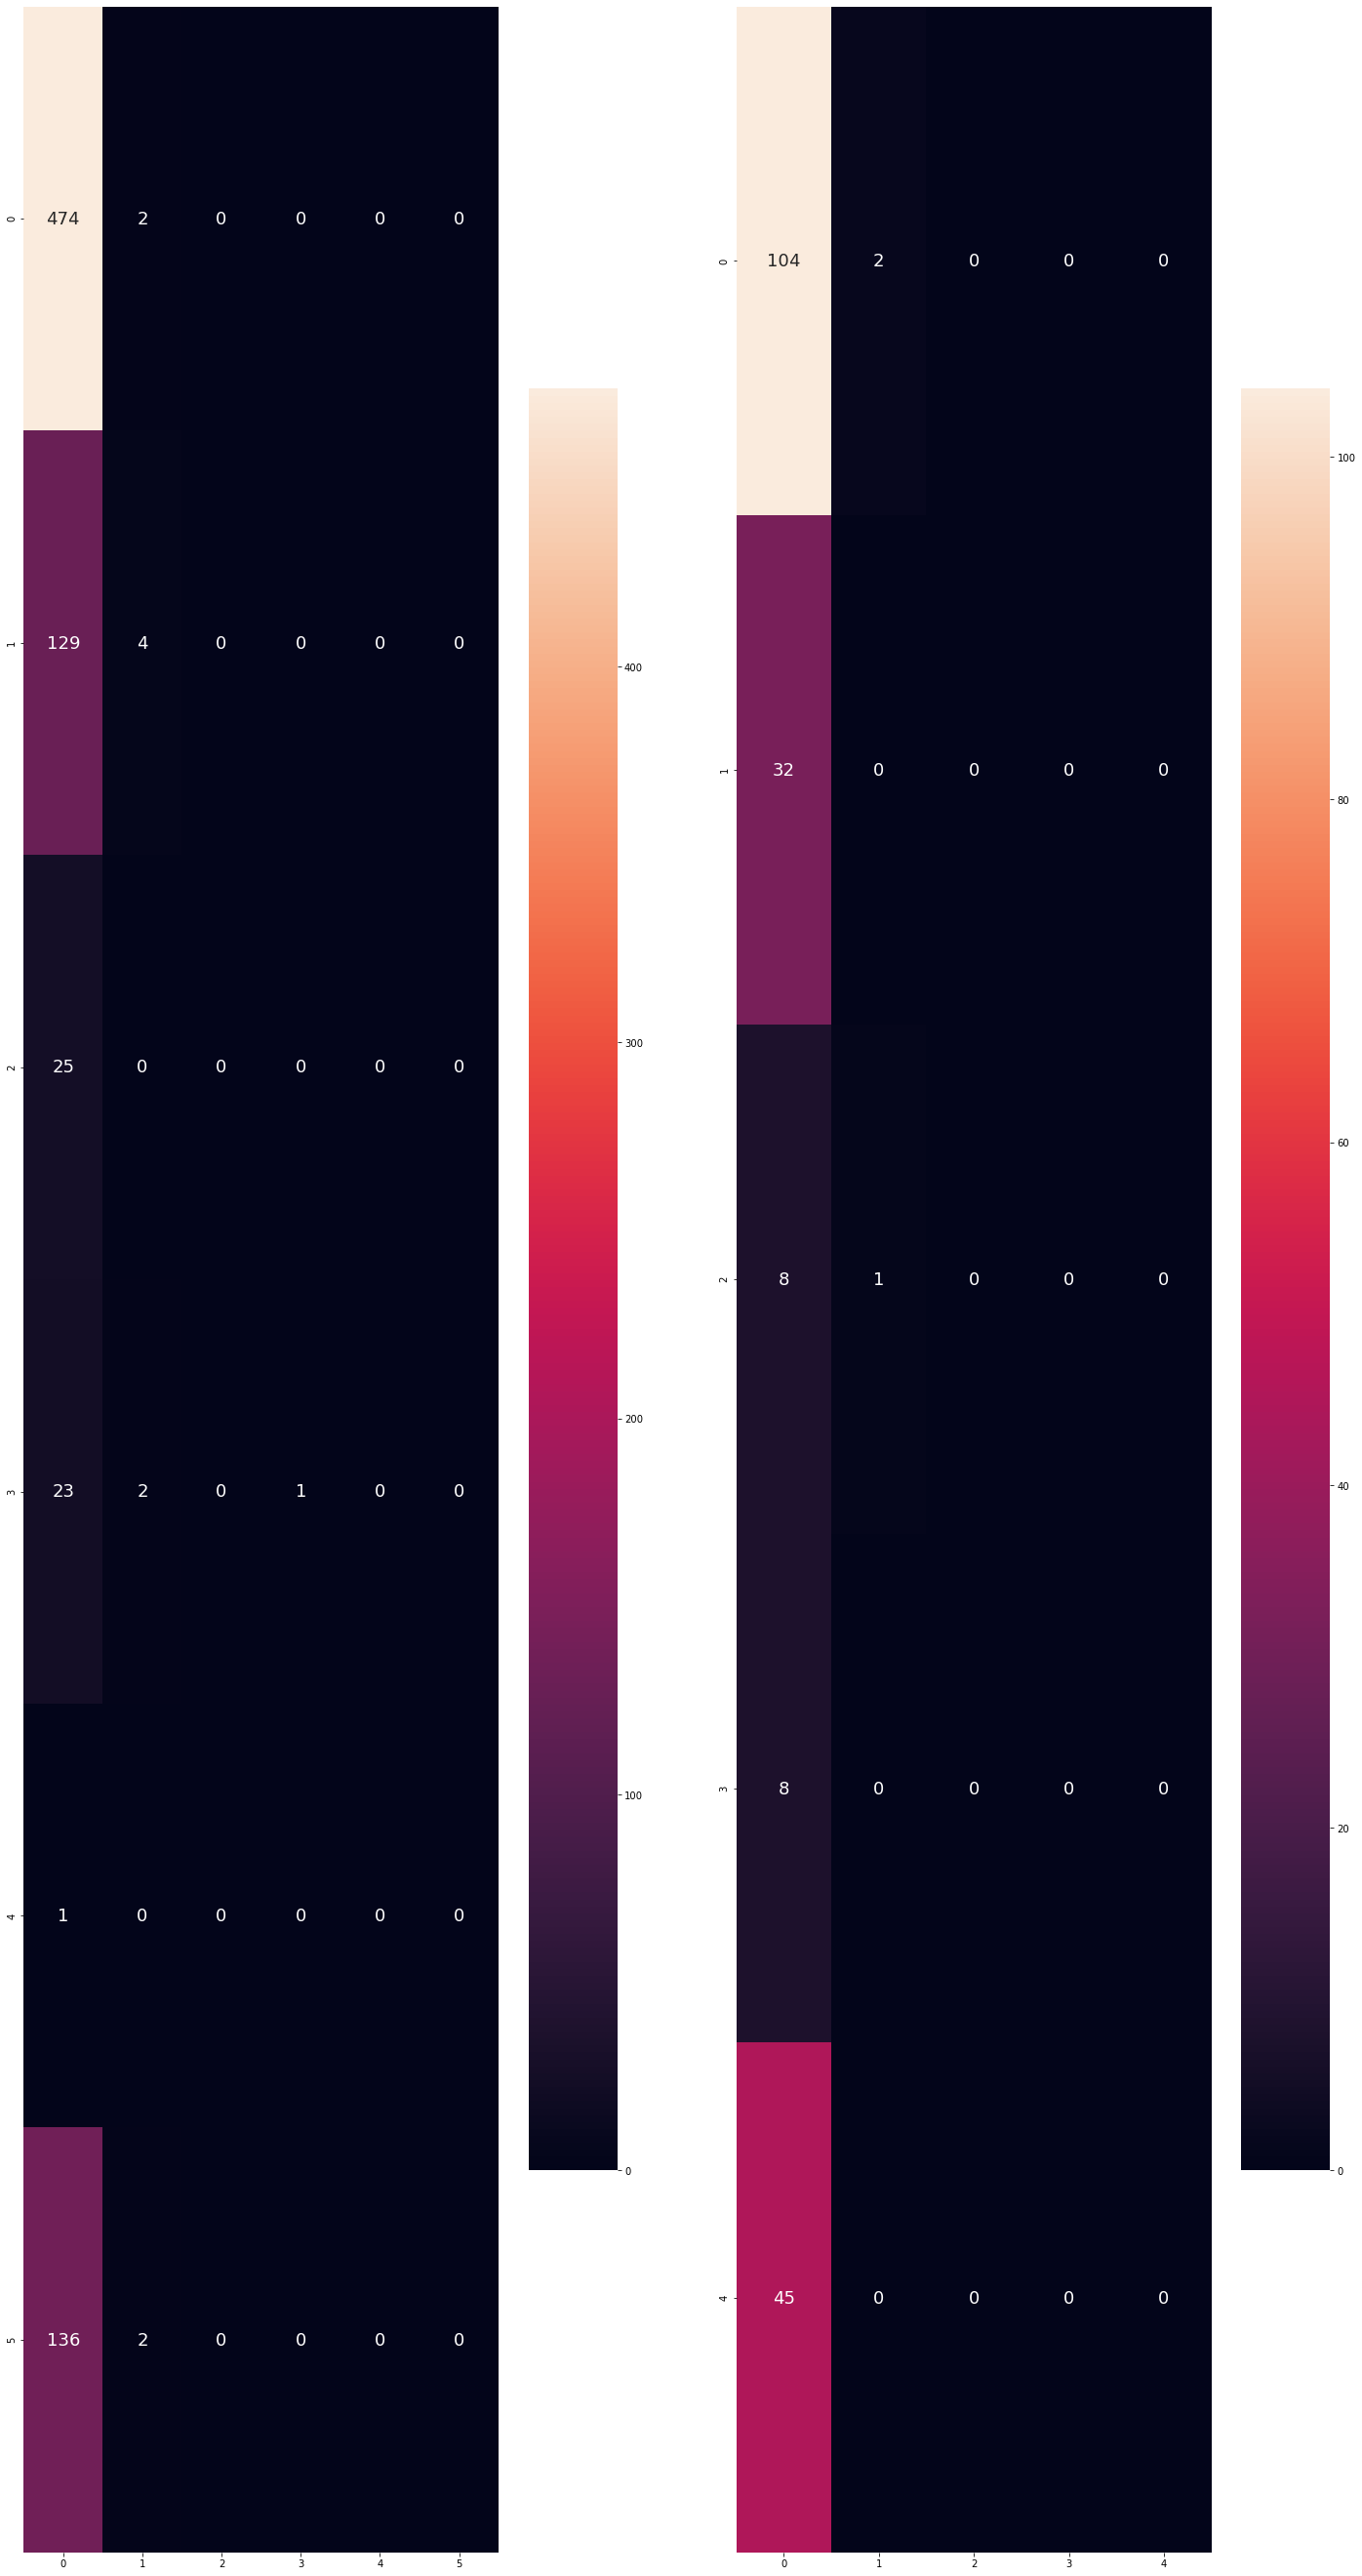

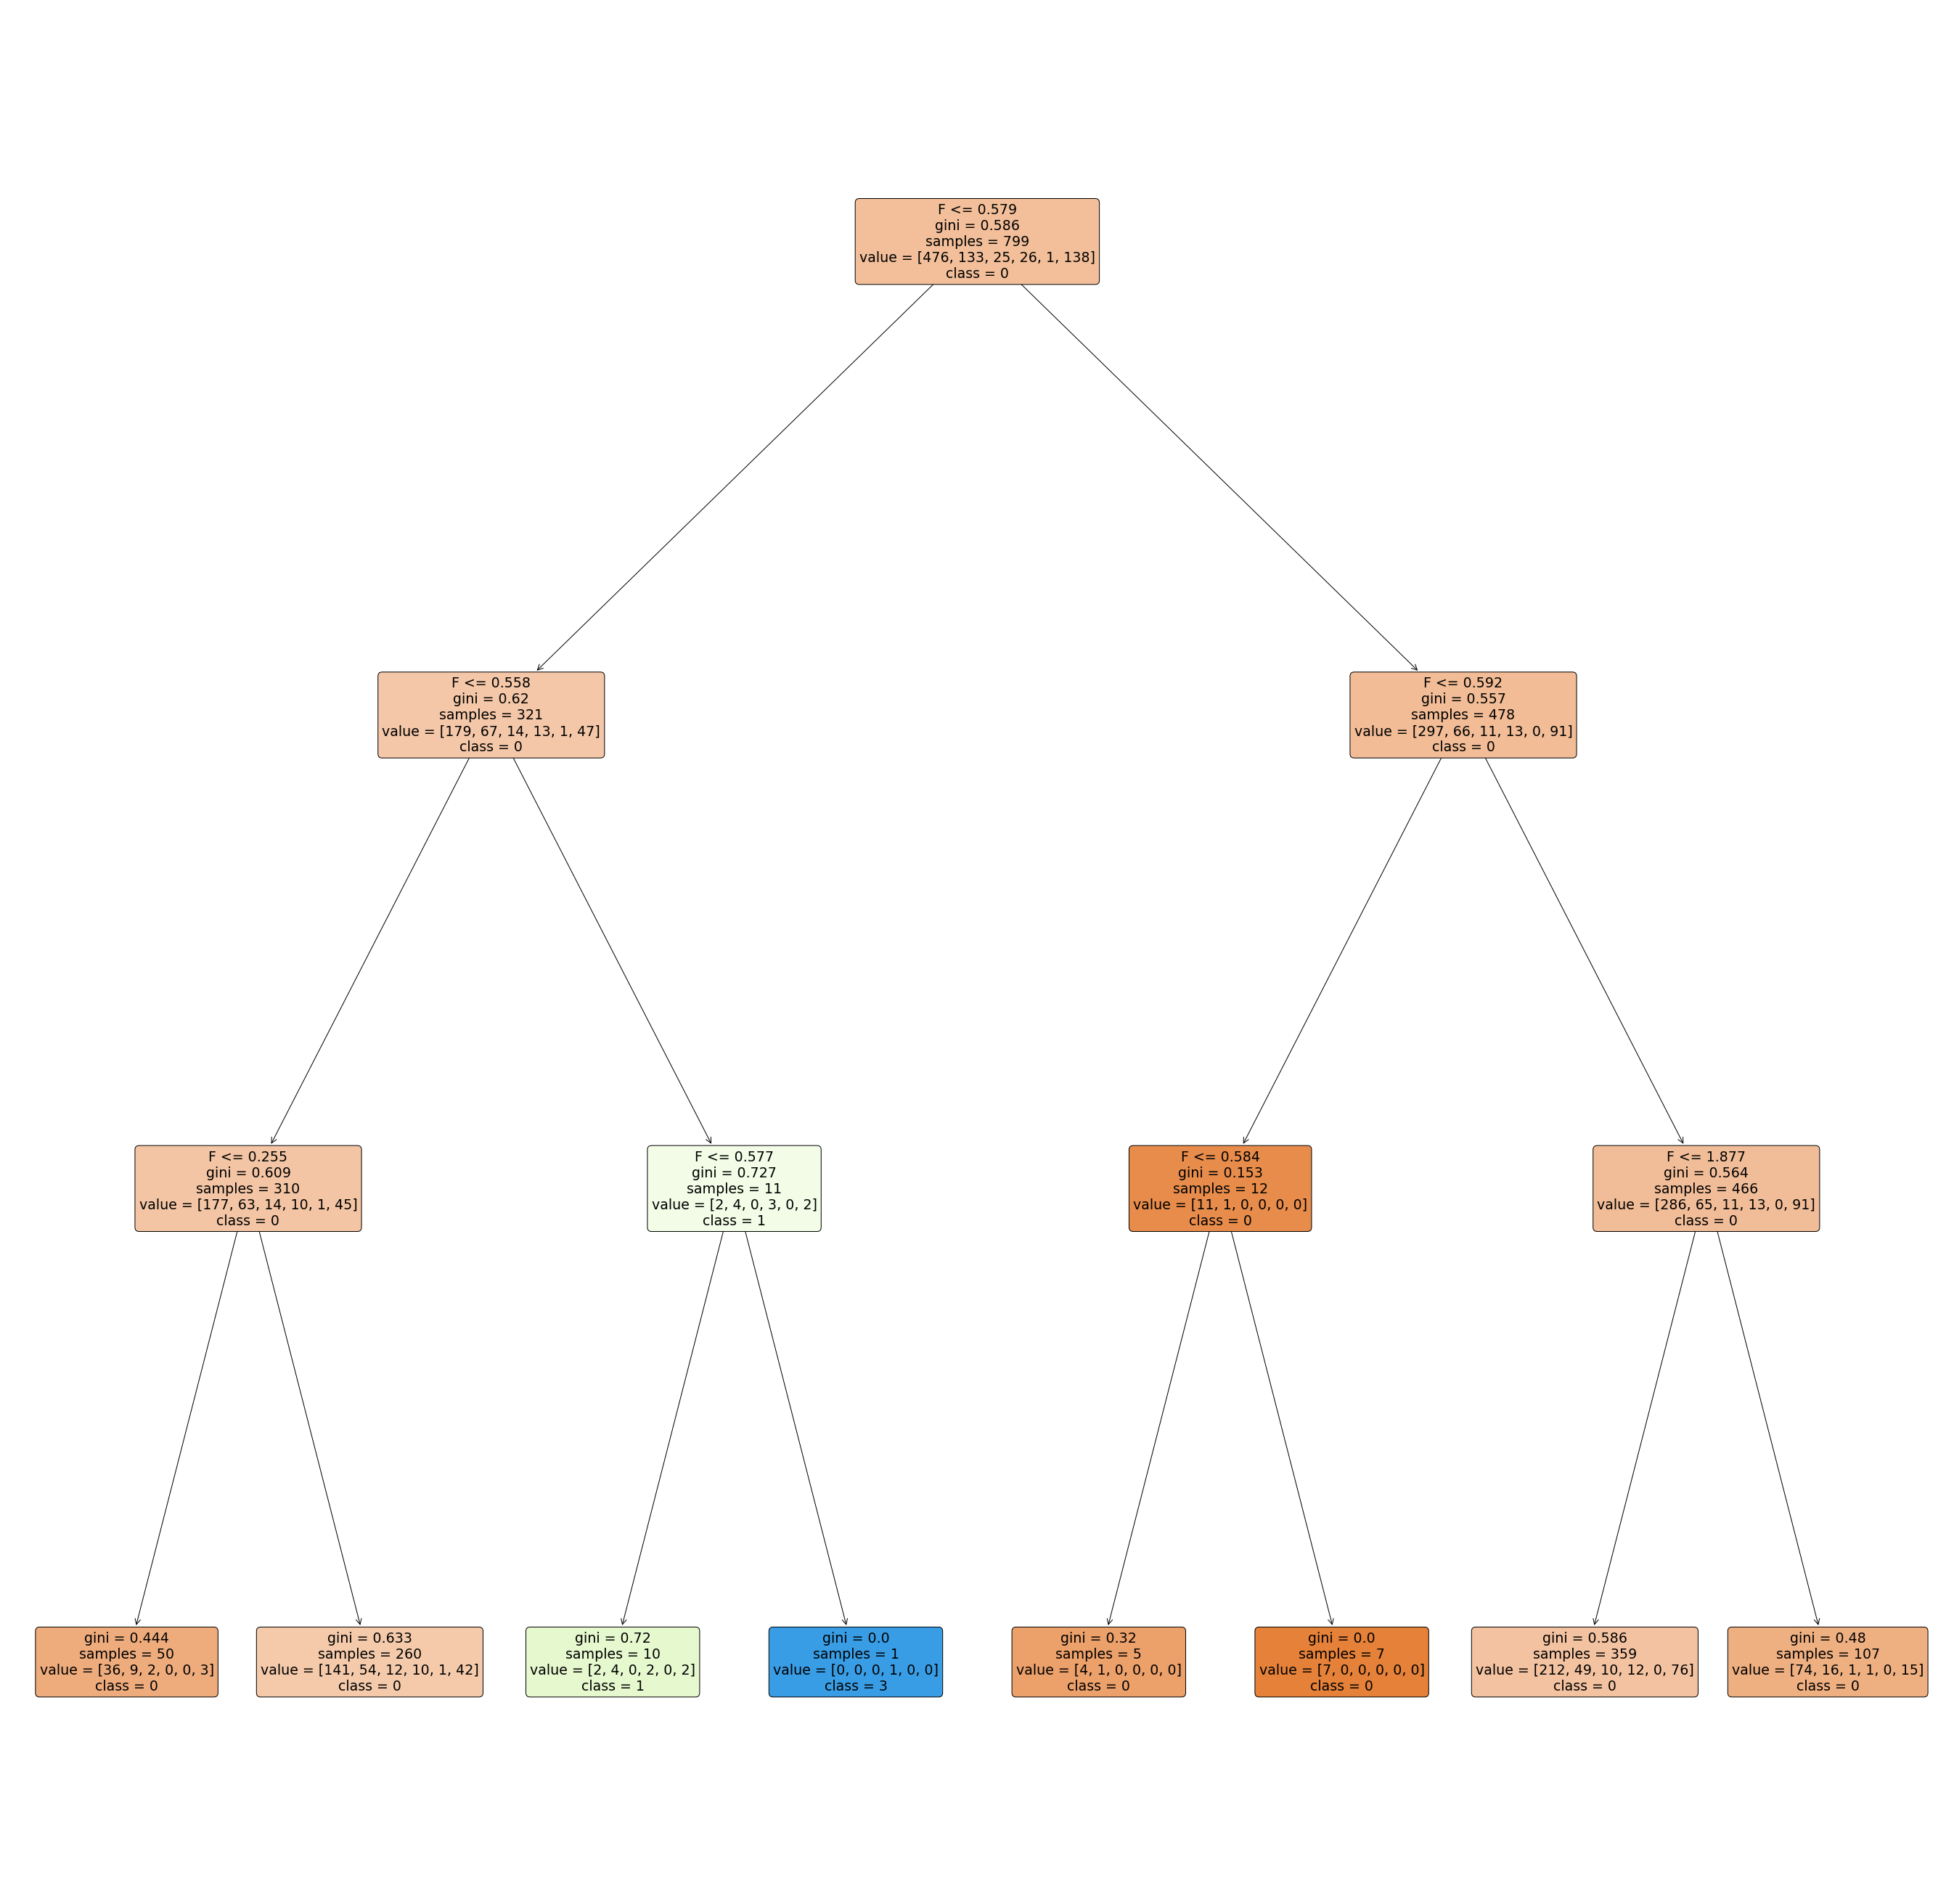

In [17]:
decTree(TV_data["Source_reference"].iloc[:999].to_numpy().reshape(-1,1),TV_data["Fav%"].iloc[:999].to_numpy().reshape(-1,1),3)

POLY REGRESSION FAILS BC COOR IS TOO LOW

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X1 = TV_data_manga["genre_reference_1"].iloc[:3000].to_numpy().reshape(-1,1) #0.20 without
X2 = TV_data_manga["genre_reference_2"].iloc[:3000].to_numpy().reshape(-1,1) #0.18 without
X3 = TV_data_manga["Season"].iloc[:3000].to_numpy().reshape(-1,1) #0.25 without
X4 = TV_data_manga["Source_reference"].iloc[:3000].to_numpy().reshape(-1,1) ##0.12 without
X5 = TV_data_manga['Members'].iloc[:3000].to_numpy().reshape(-1,1) #0.32 without (deg9)
X6 = TV_data_manga['Episodes'].iloc[:3000].to_numpy().reshape(-1,1) #0.39 without, aka useless
X = np.concatenate((X1, X2, X3, X4, X5), axis=1) #0.39 with X1-5 deg2
y = TV_data_manga["Score"].iloc[:3000]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

r_sq = model.score(X_poly, y)
print('R^2 score:', r_sq)

R^2 score: 0.3139979980376967


HAVING HIGH/MID/LOW PRODUCES A DECEPTIVELY HIGH ACCURACY AS THE DECTREE WILL CLASS EVERYTHING AS MID WHICH IS THE LARGEST POPULATION

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9687756778964667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9606557377049181



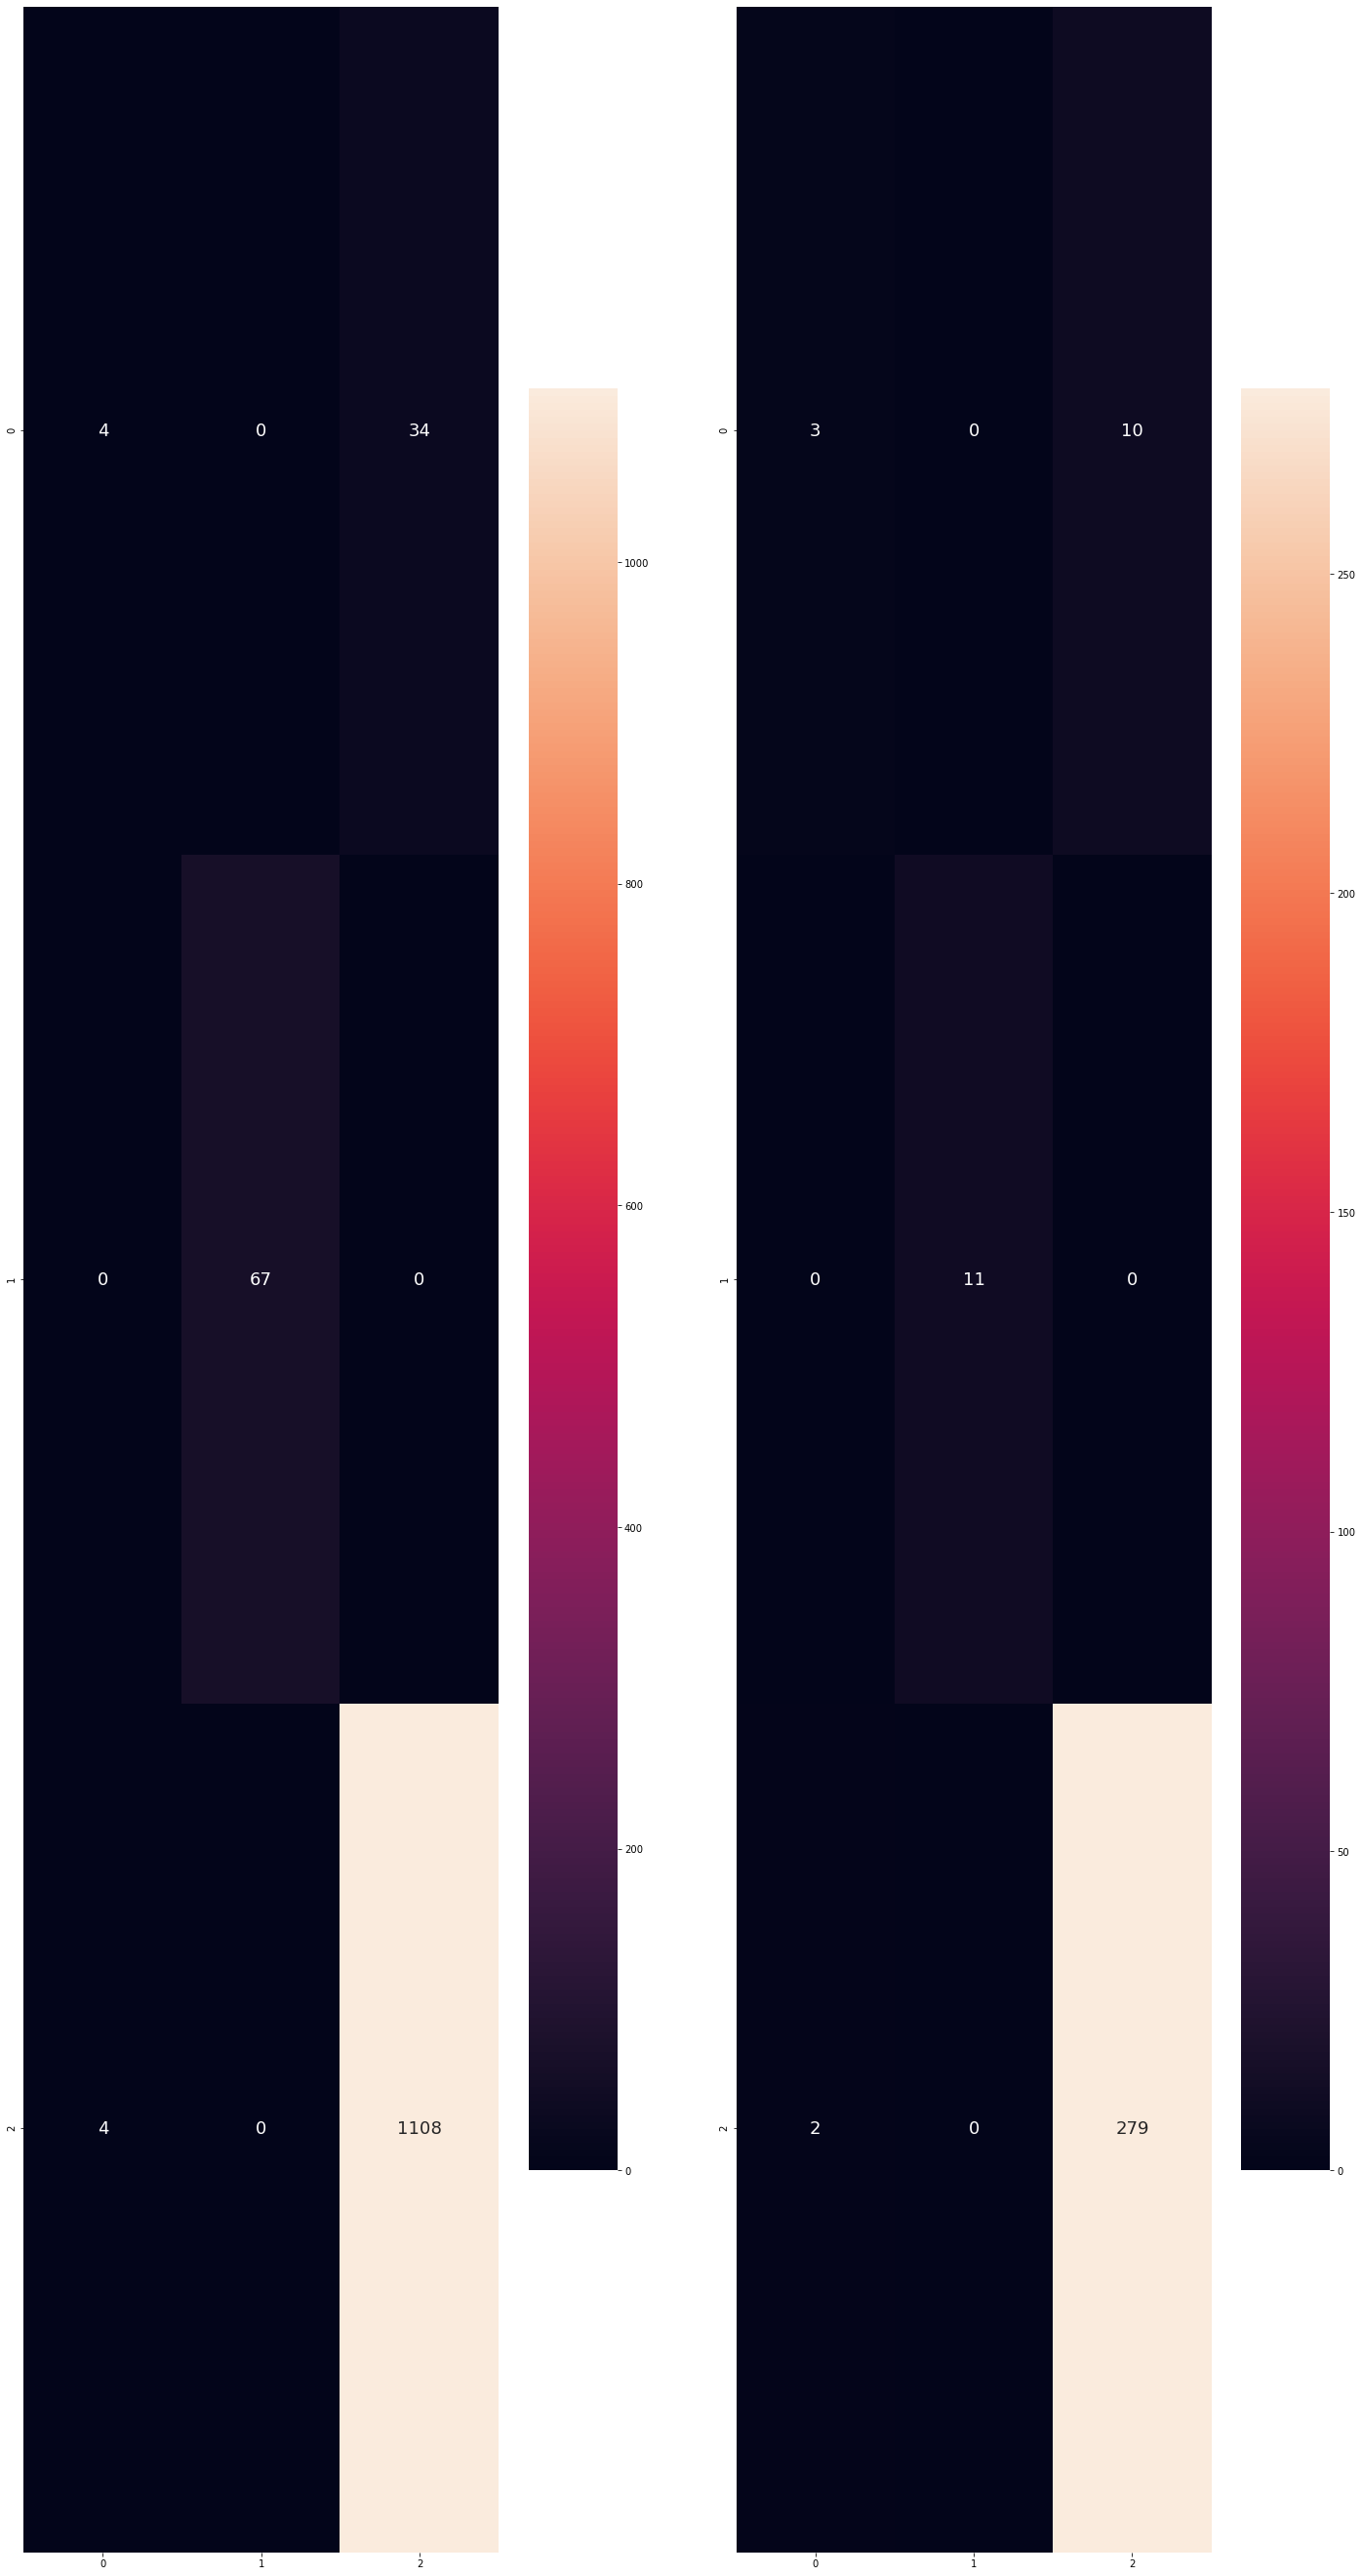

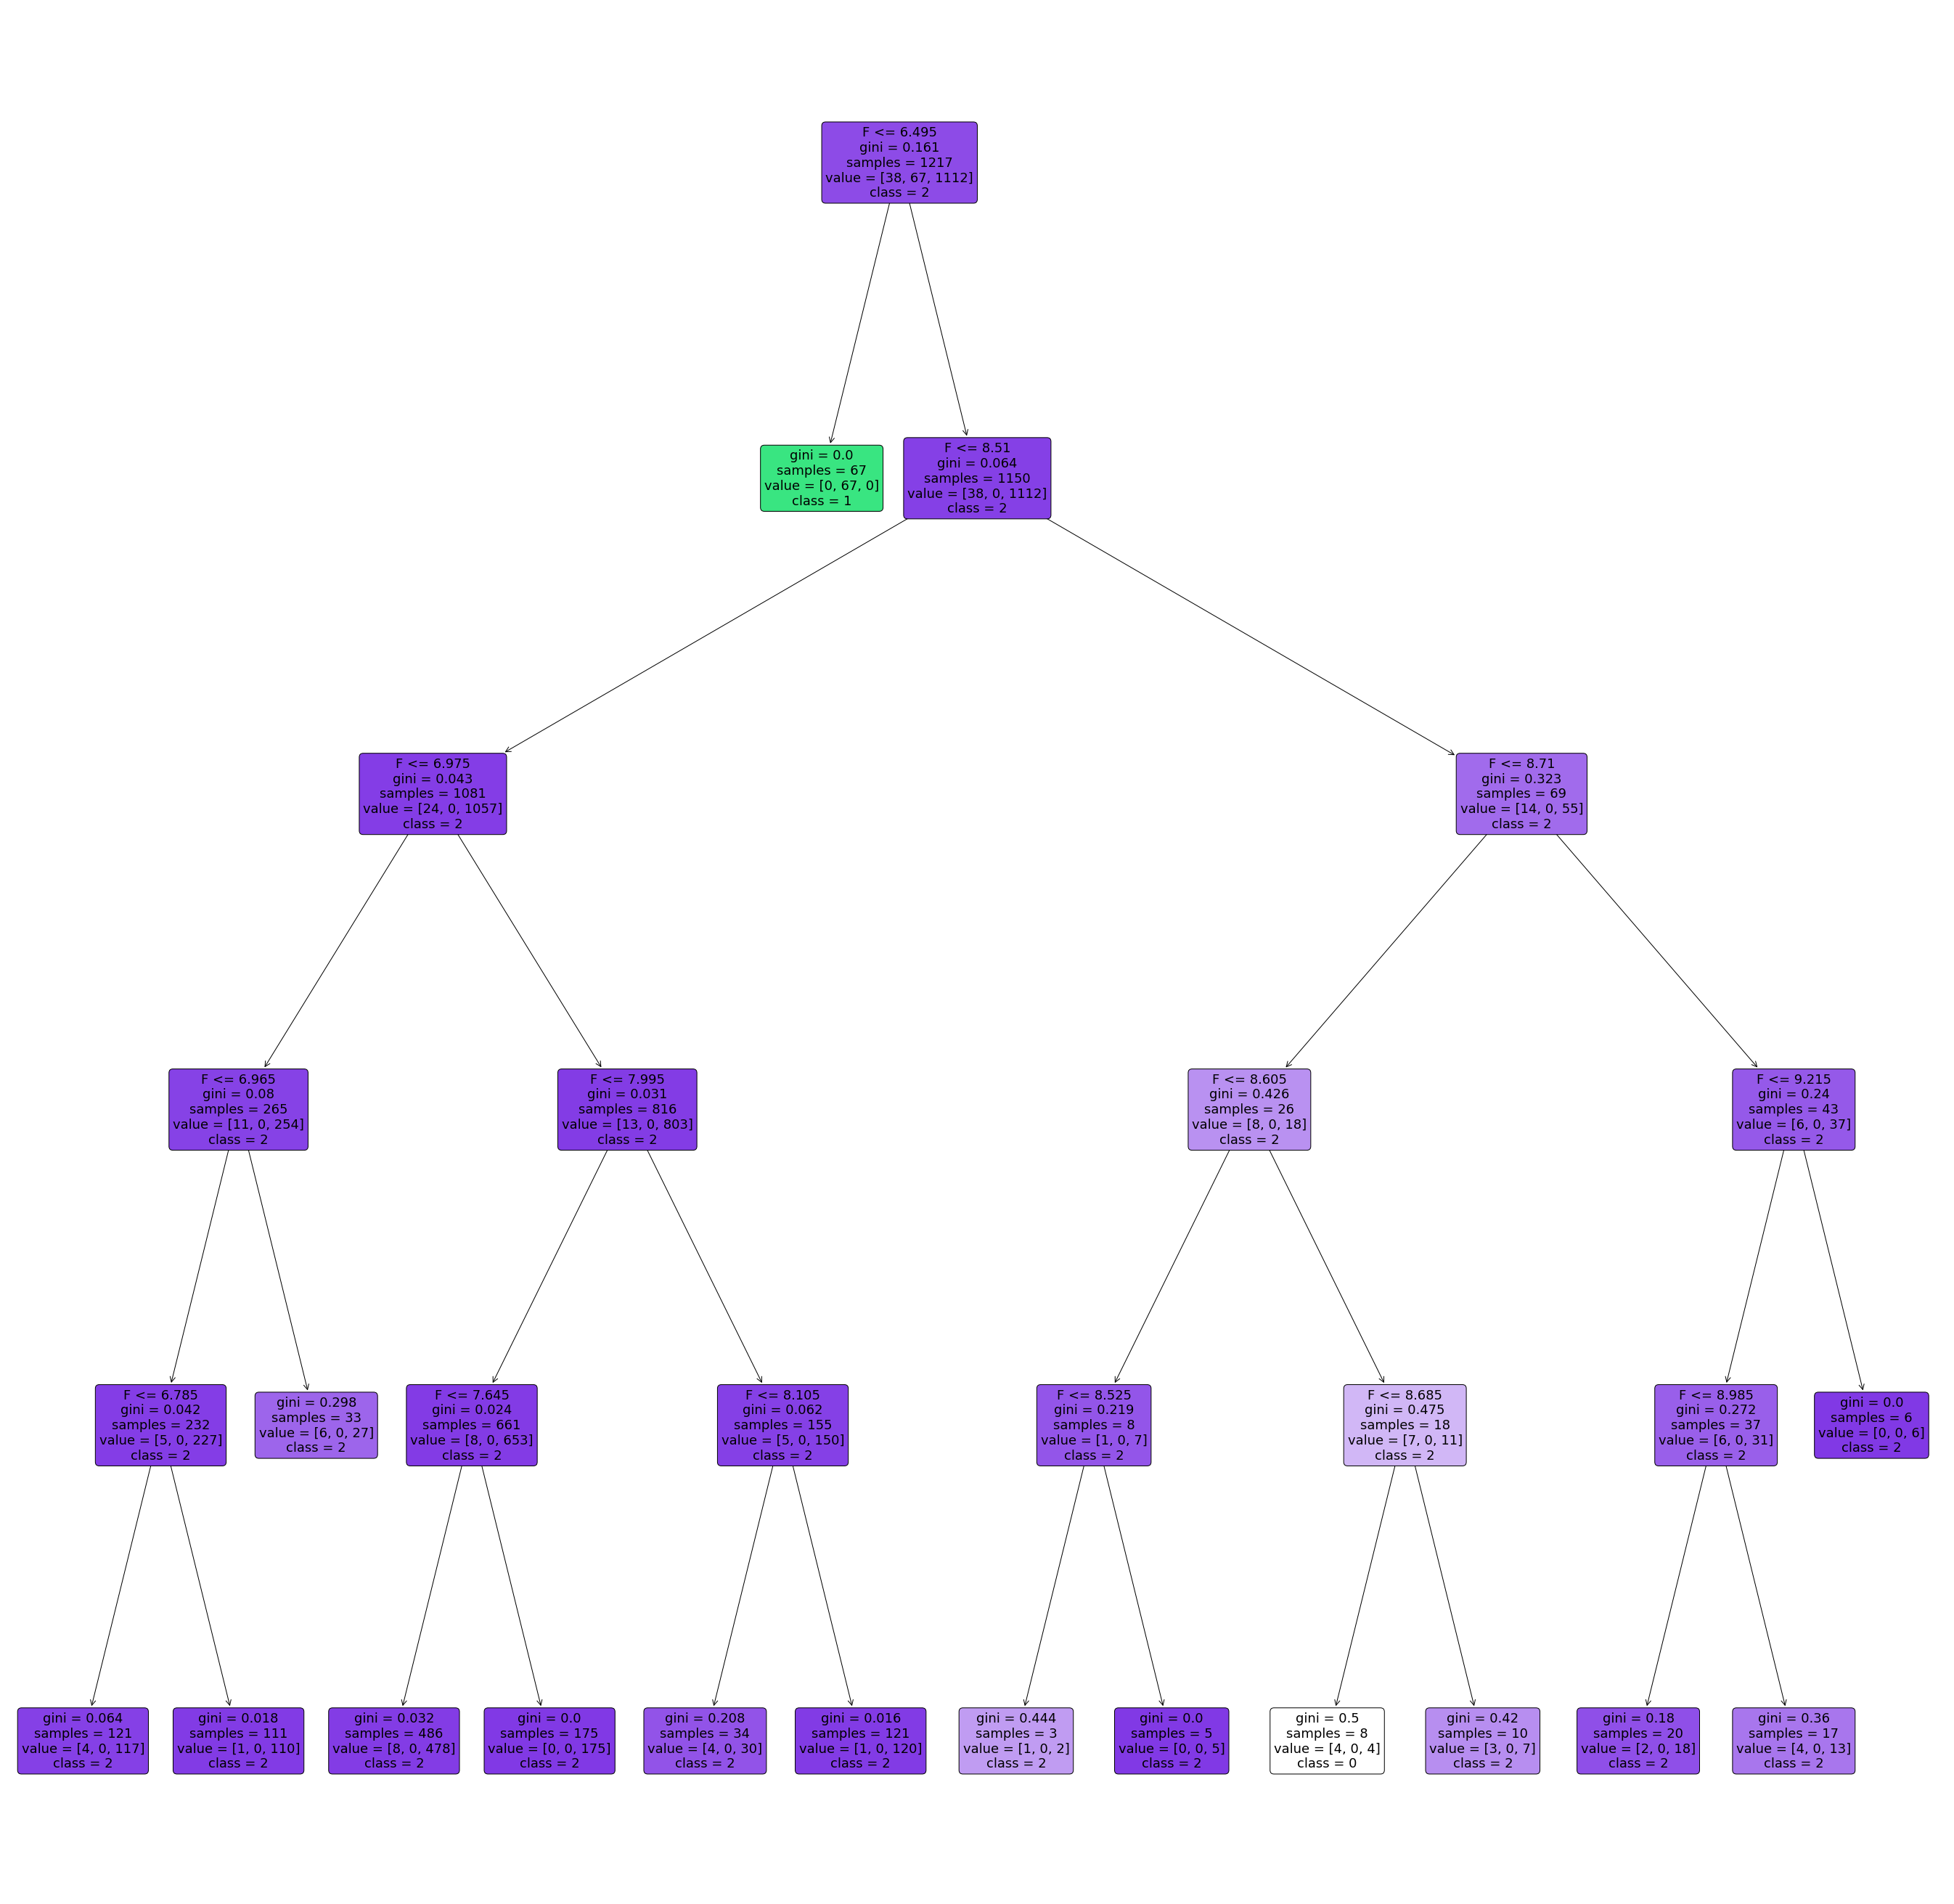

In [7]:
decTree(TV_data_manga["Score_reference"].to_numpy().reshape(-1,1),TV_data_manga["Manga_score"].to_numpy().reshape(-1,1),5)

DECIDE ON HAVING ISGOOD/ISNOTGOOD RATING INSTEAD

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6811832374691865

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7245901639344262



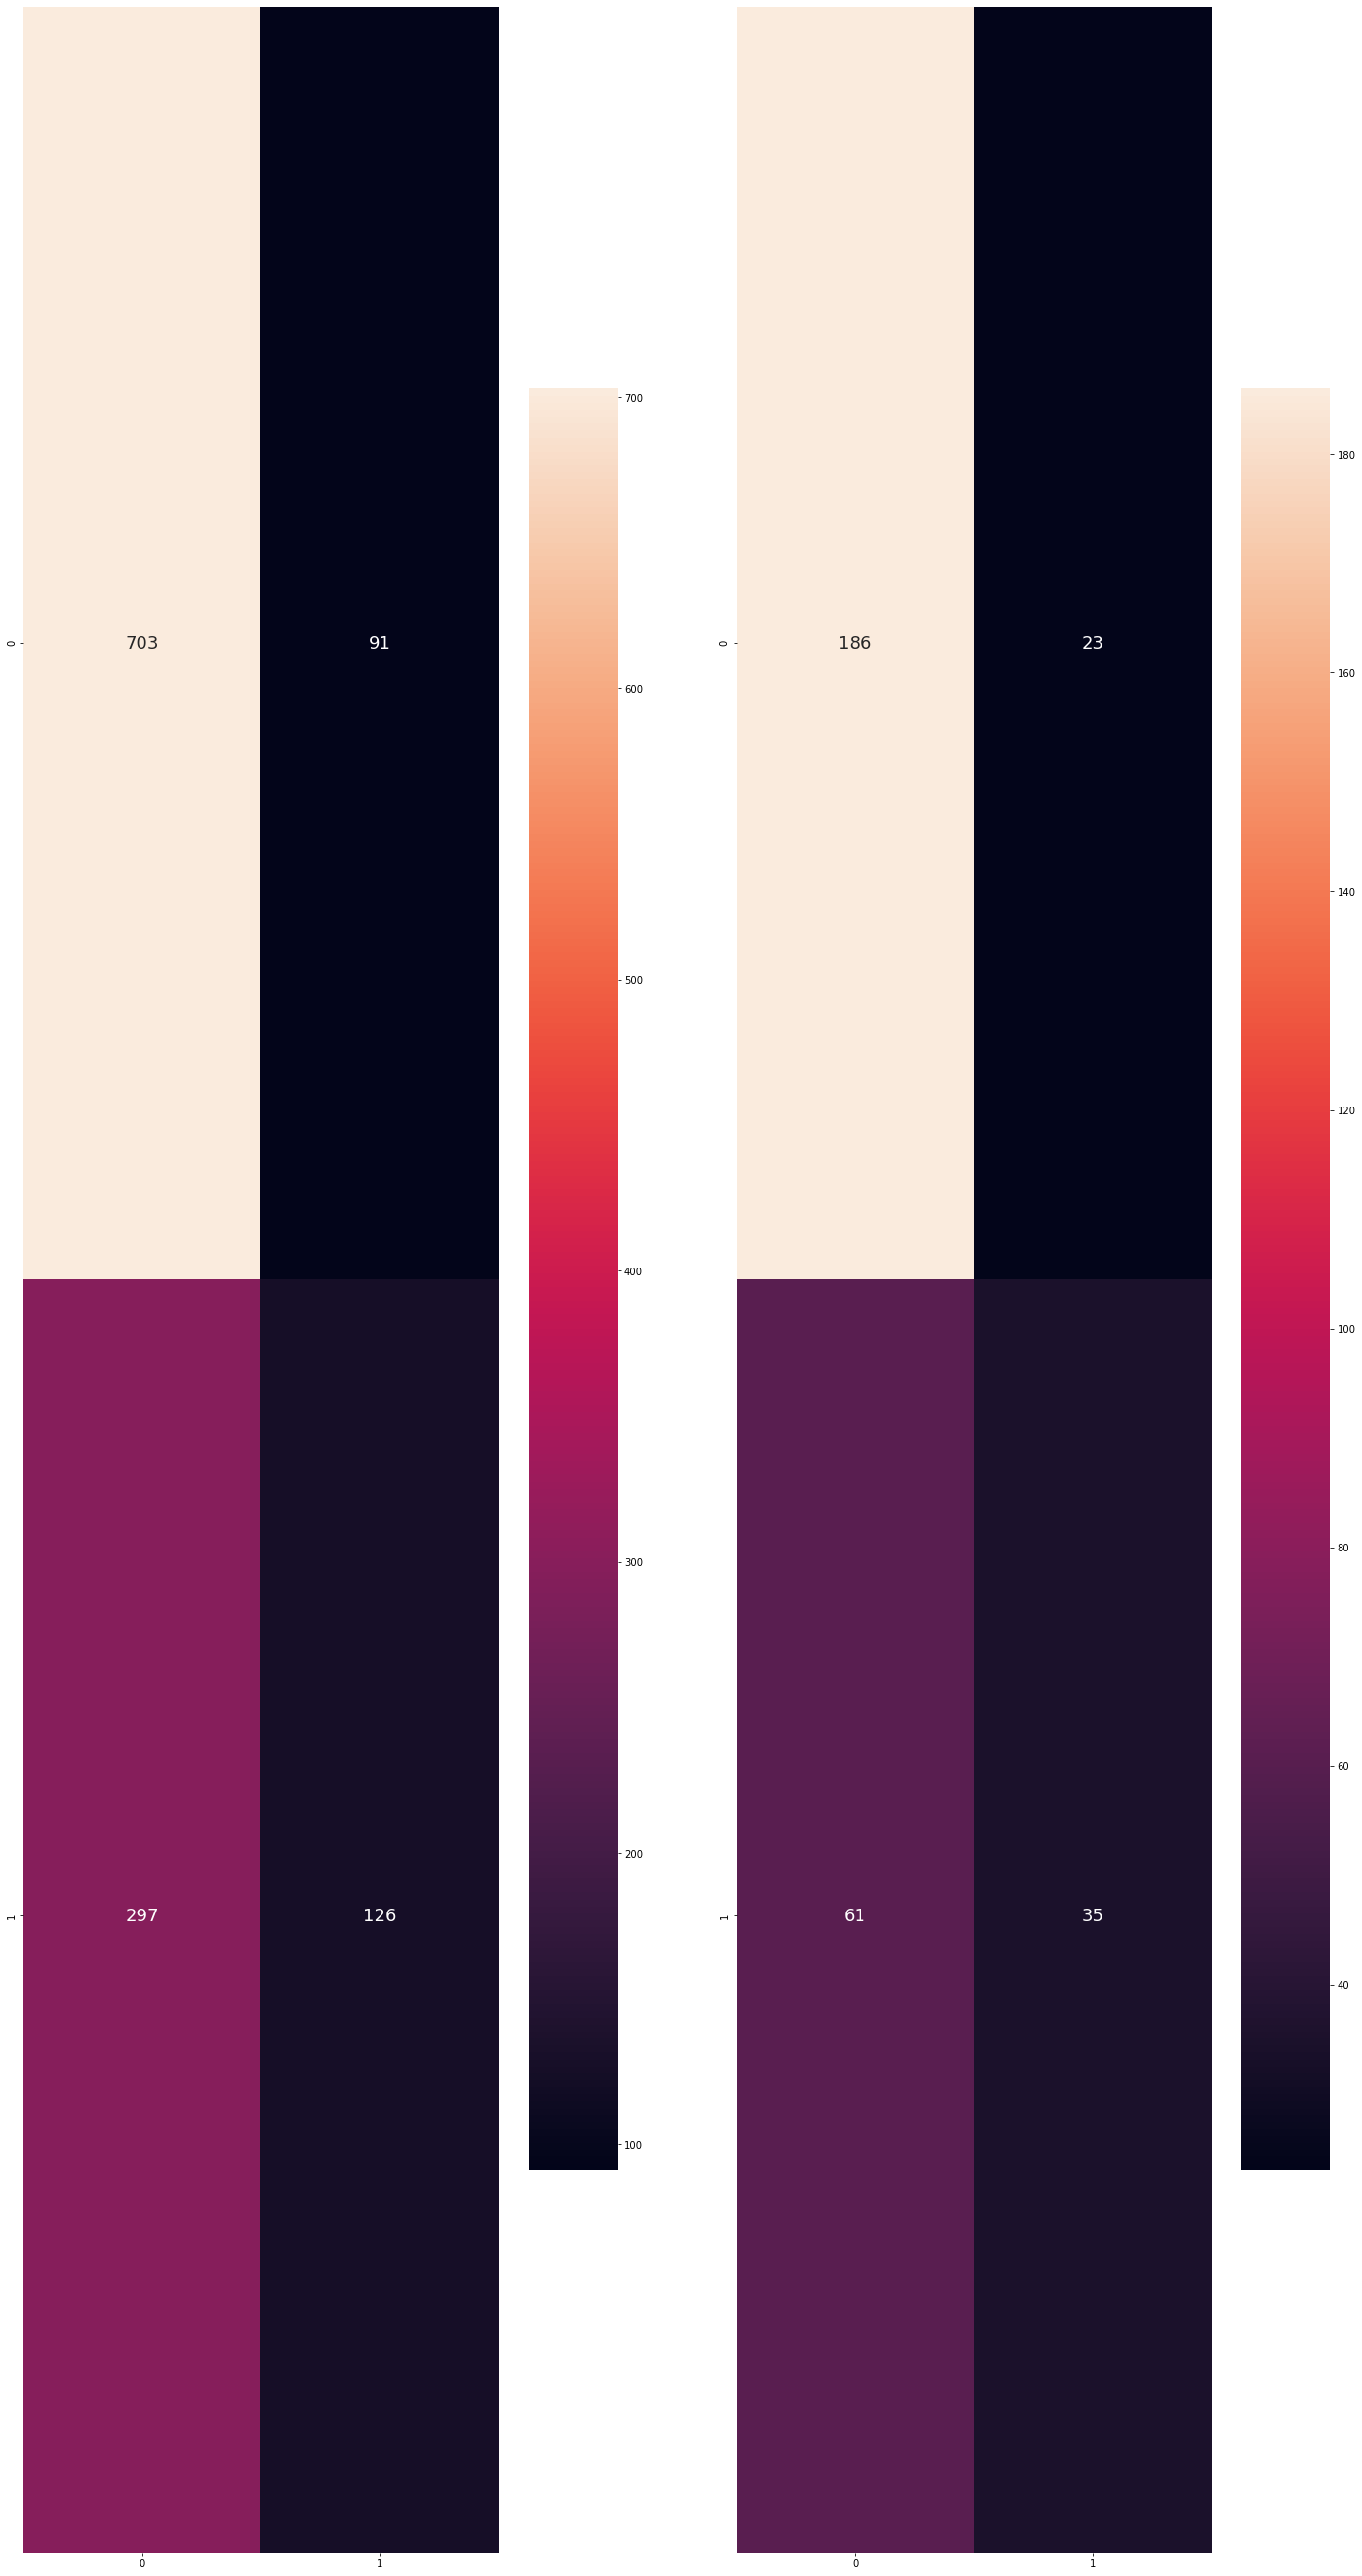

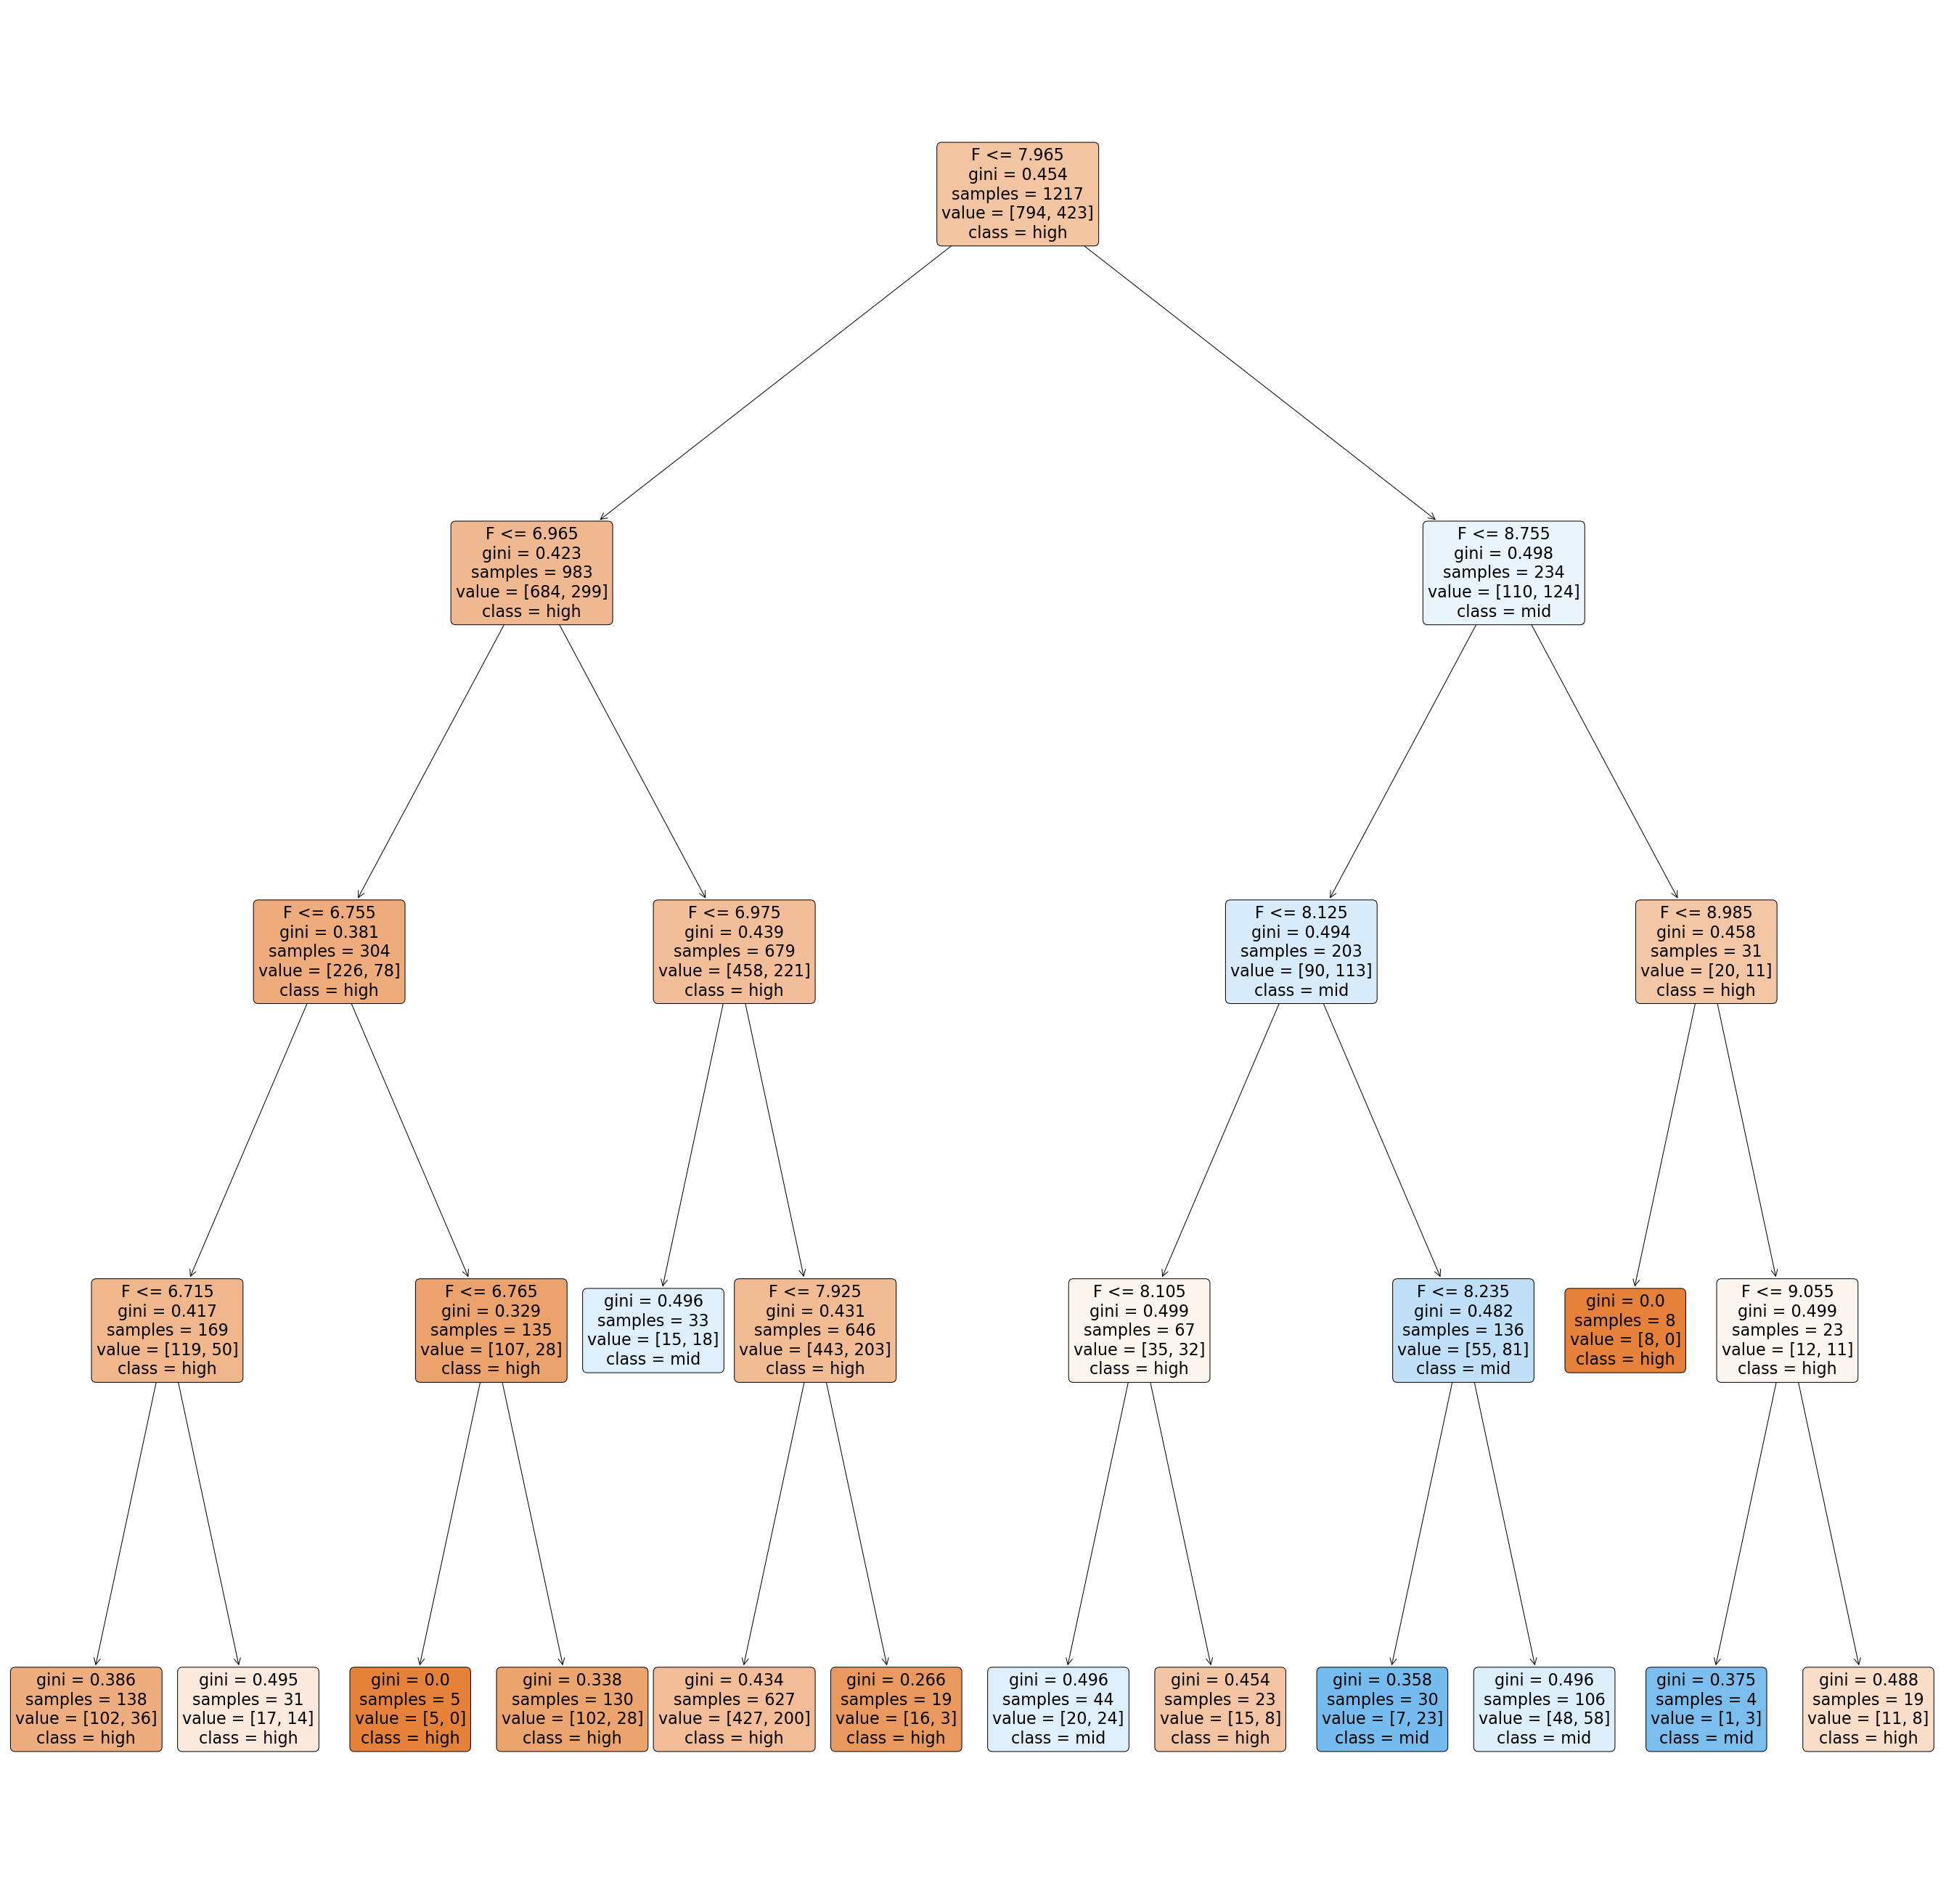

In [42]:
decTree(TV_data_manga["Score_reference2"].to_numpy().reshape(-1,1),TV_data_manga["Manga_score"].to_numpy().reshape(-1,1),4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9679539852095317

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9508196721311475



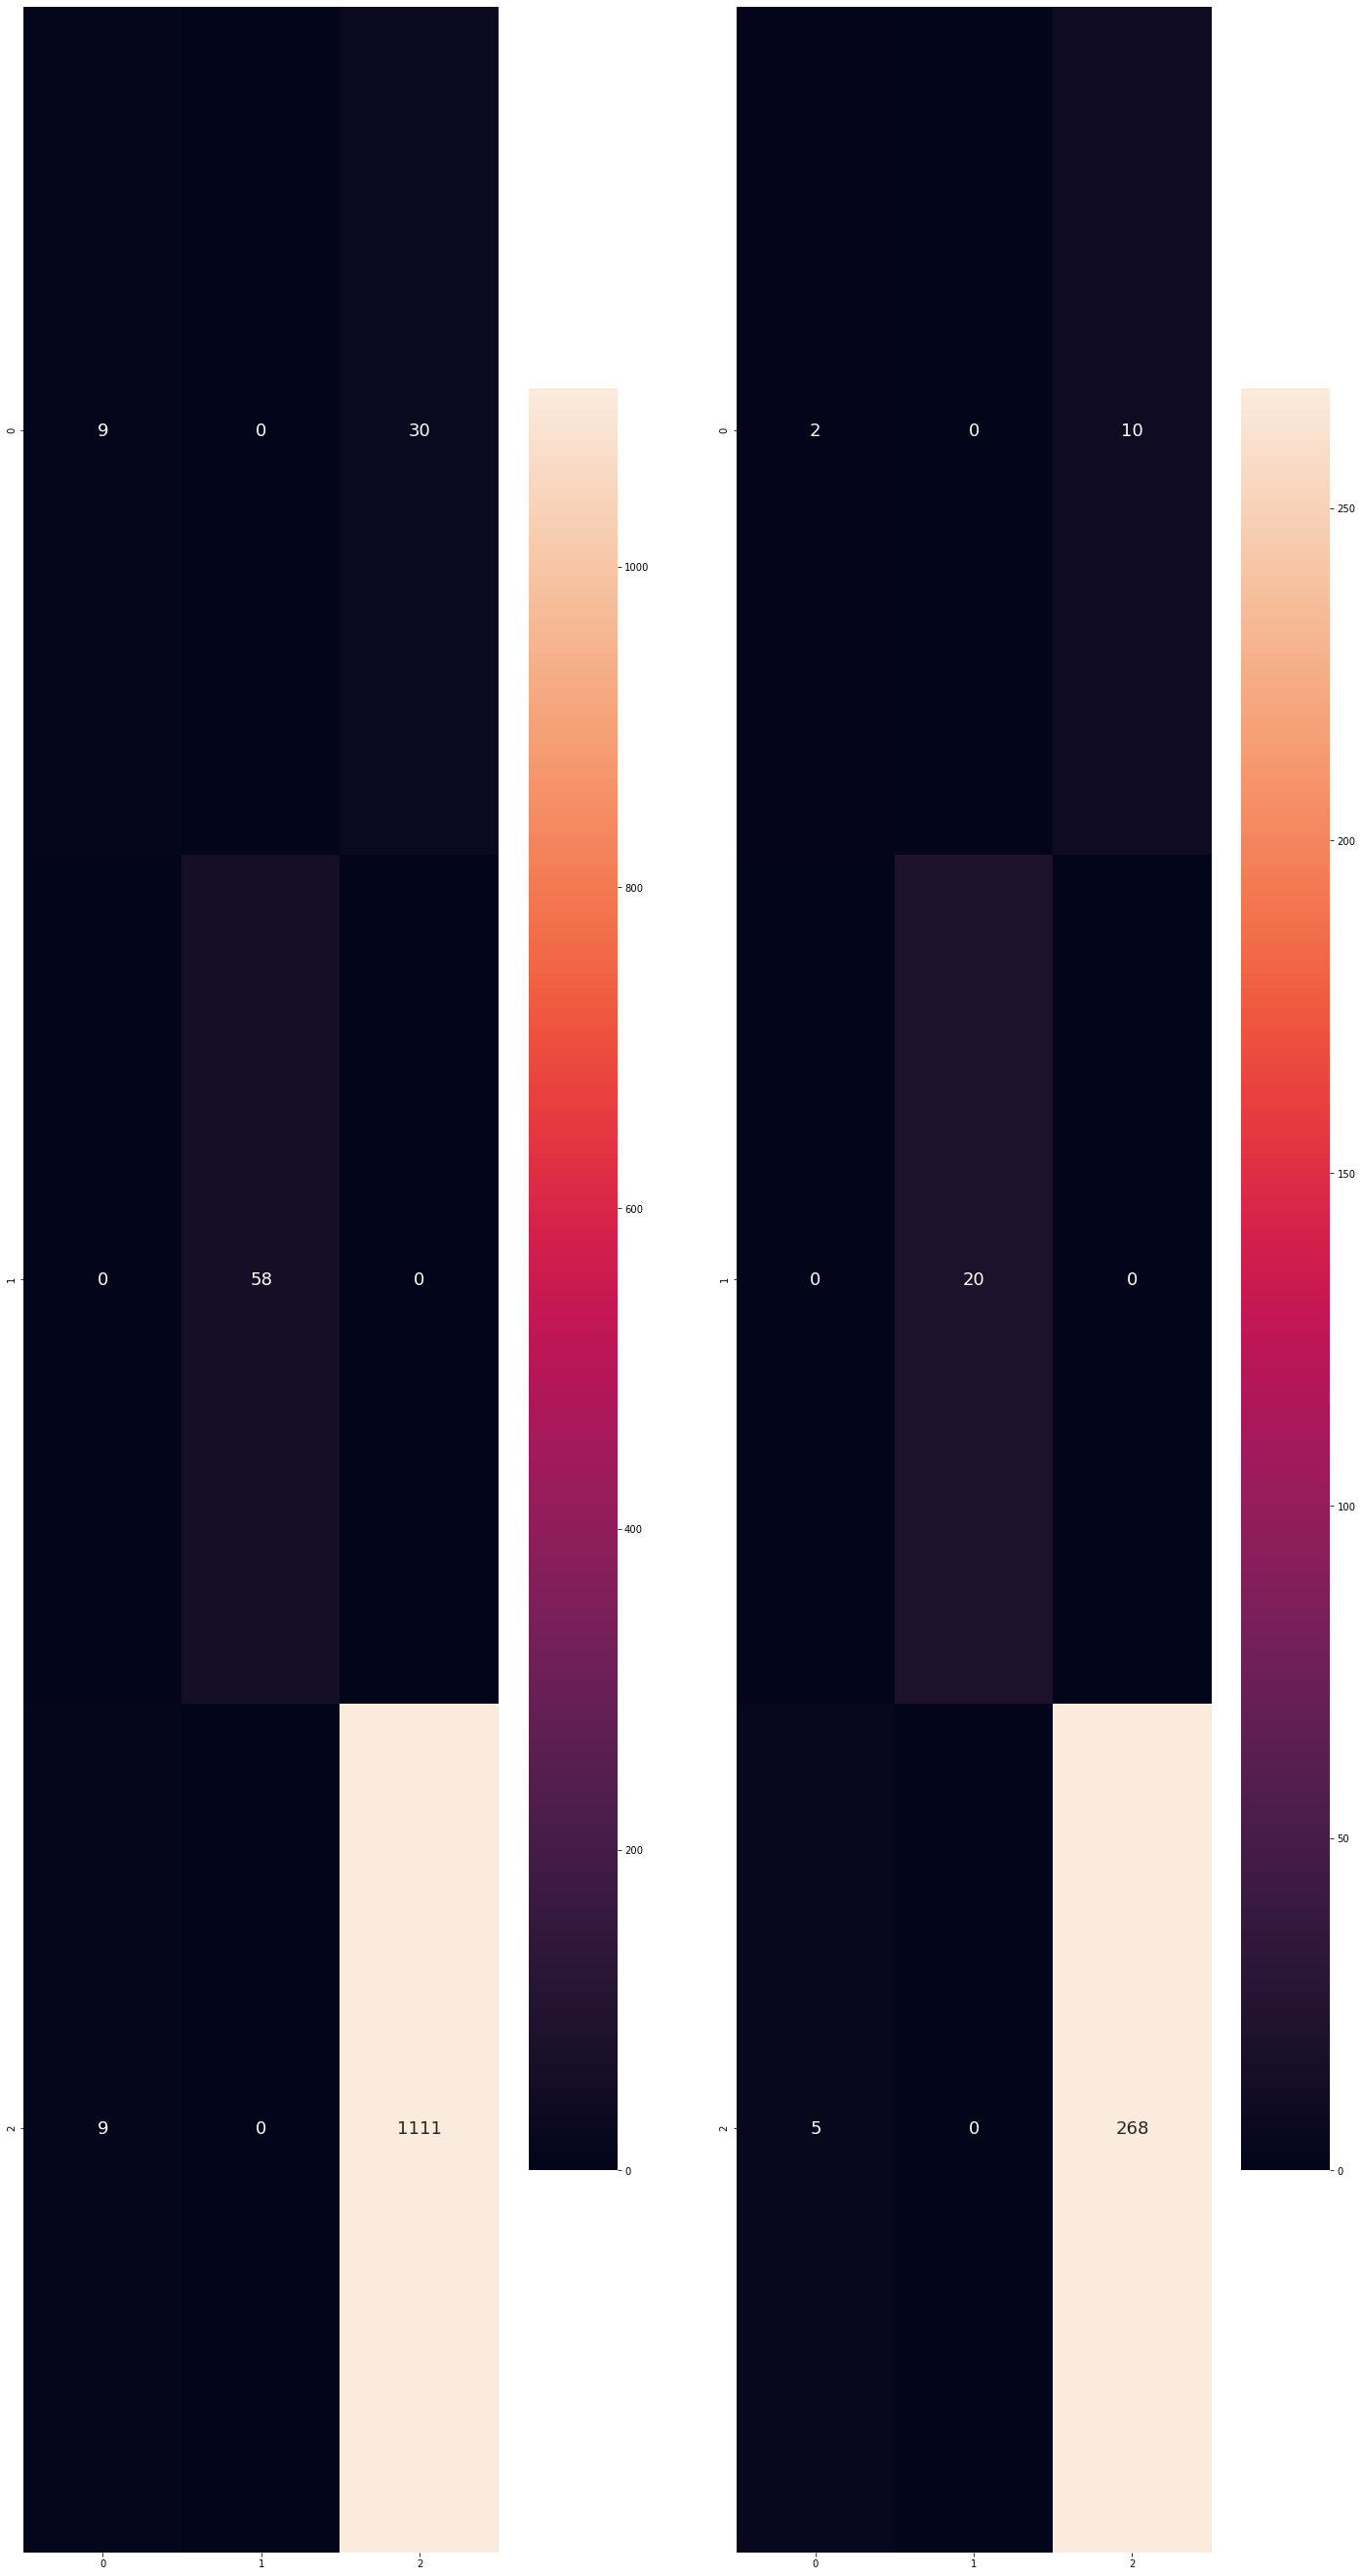

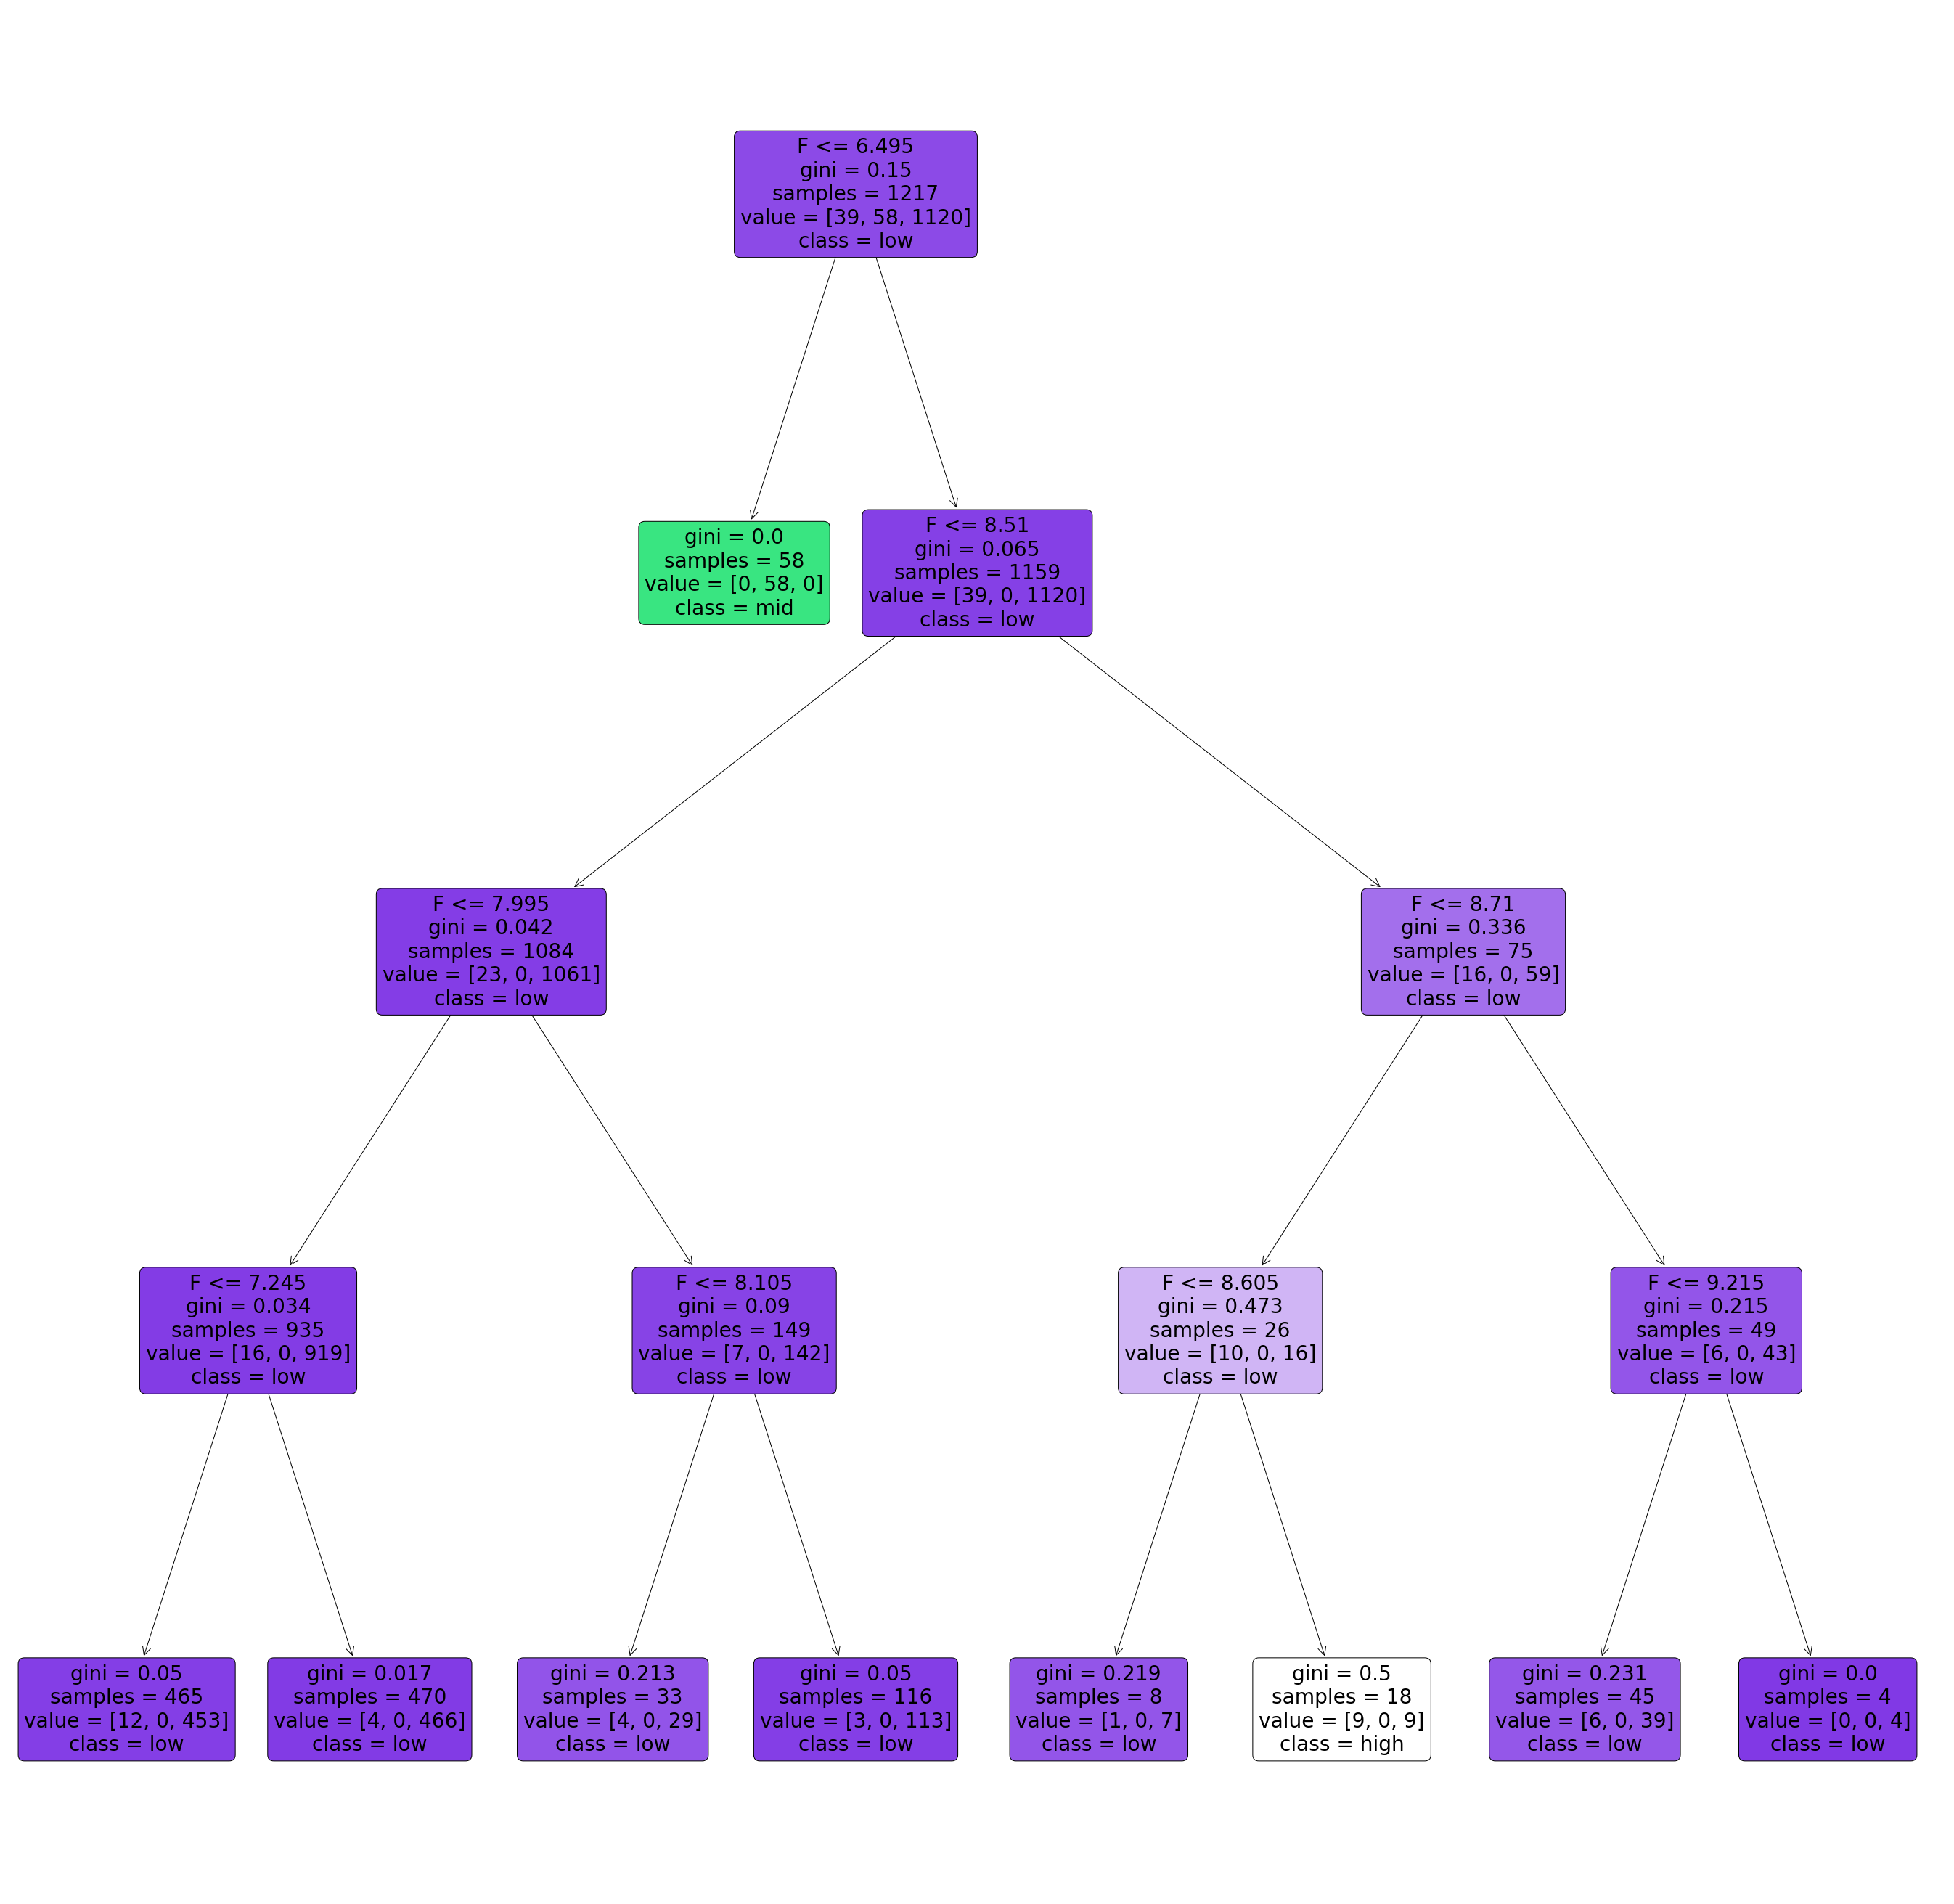

In [44]:
decTree(TV_data_manga["Score_reference"].to_numpy().reshape(-1,1),TV_data_manga["Manga_score"].to_numpy().reshape(-1,1),4)

In [22]:
def decTree2(y, x1, x2, depth):
    x = pd.concat([x1, x2], axis=1)
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)    
    dectree = DecisionTreeClassifier(max_depth = depth)
    dectree.fit(X_train, Y_train)
    Y_train_pred = dectree.predict(X_train)
    Y_test_pred = dectree.predict(X_test)
    cm = confusion_matrix(Y_train, Y_train_pred)
    TP = cm[1][1]/(cm[1][1] + cm[1][0])
    FP = cm[0][1]/(cm[0][1] + cm[0][0])
    cm1 = confusion_matrix(Y_test, Y_test_pred)
    TP1 = cm1[1][1]/(cm1[1][1] + cm1[1][0])
    FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
    #print("True Positive Rate \t:", TP)
    #print("False Positive Rate\t:", FP)
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
    #print("True Positive Rate \t:", TP1)
    #print("False Positive Rate\t:", FP1)
    print()
    f, axes = plt.subplots(1, 2, figsize=(24, 48))
    sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    f = plt.figure(figsize=(48,48))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names="Fav%", 
              class_names=['Null',
 'Action',
 'Military',
 'Adventure',
 'Comedy',
 'Drama',
 'Magic',
 'Fantasy',
 'Shounen',
 'Thriller',
 'Sci-Fi',
 'Historical',
 'Parody',
 'Samurai',
 'Super Power',
 'Mystery',
 'Game',
 'Seinen',
 'Slice of Life',
 'Supernatural',
 'Romance',
 'Vampire',
 'Mecha',
 'Sports',
 'School',
 'Space',
 'Psychological',
 'Josei',
 'Music',
 'Horror',
 'Police',
 'Demons',
 'Shoujo',
 'Martial Arts',
 'Shounen Ai',
 'Ecchi',
 'Kids',
 'Shoujo Ai',
 'Dementia',
 'Harem',
 'Cars'])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6770747740345111

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6426229508196721



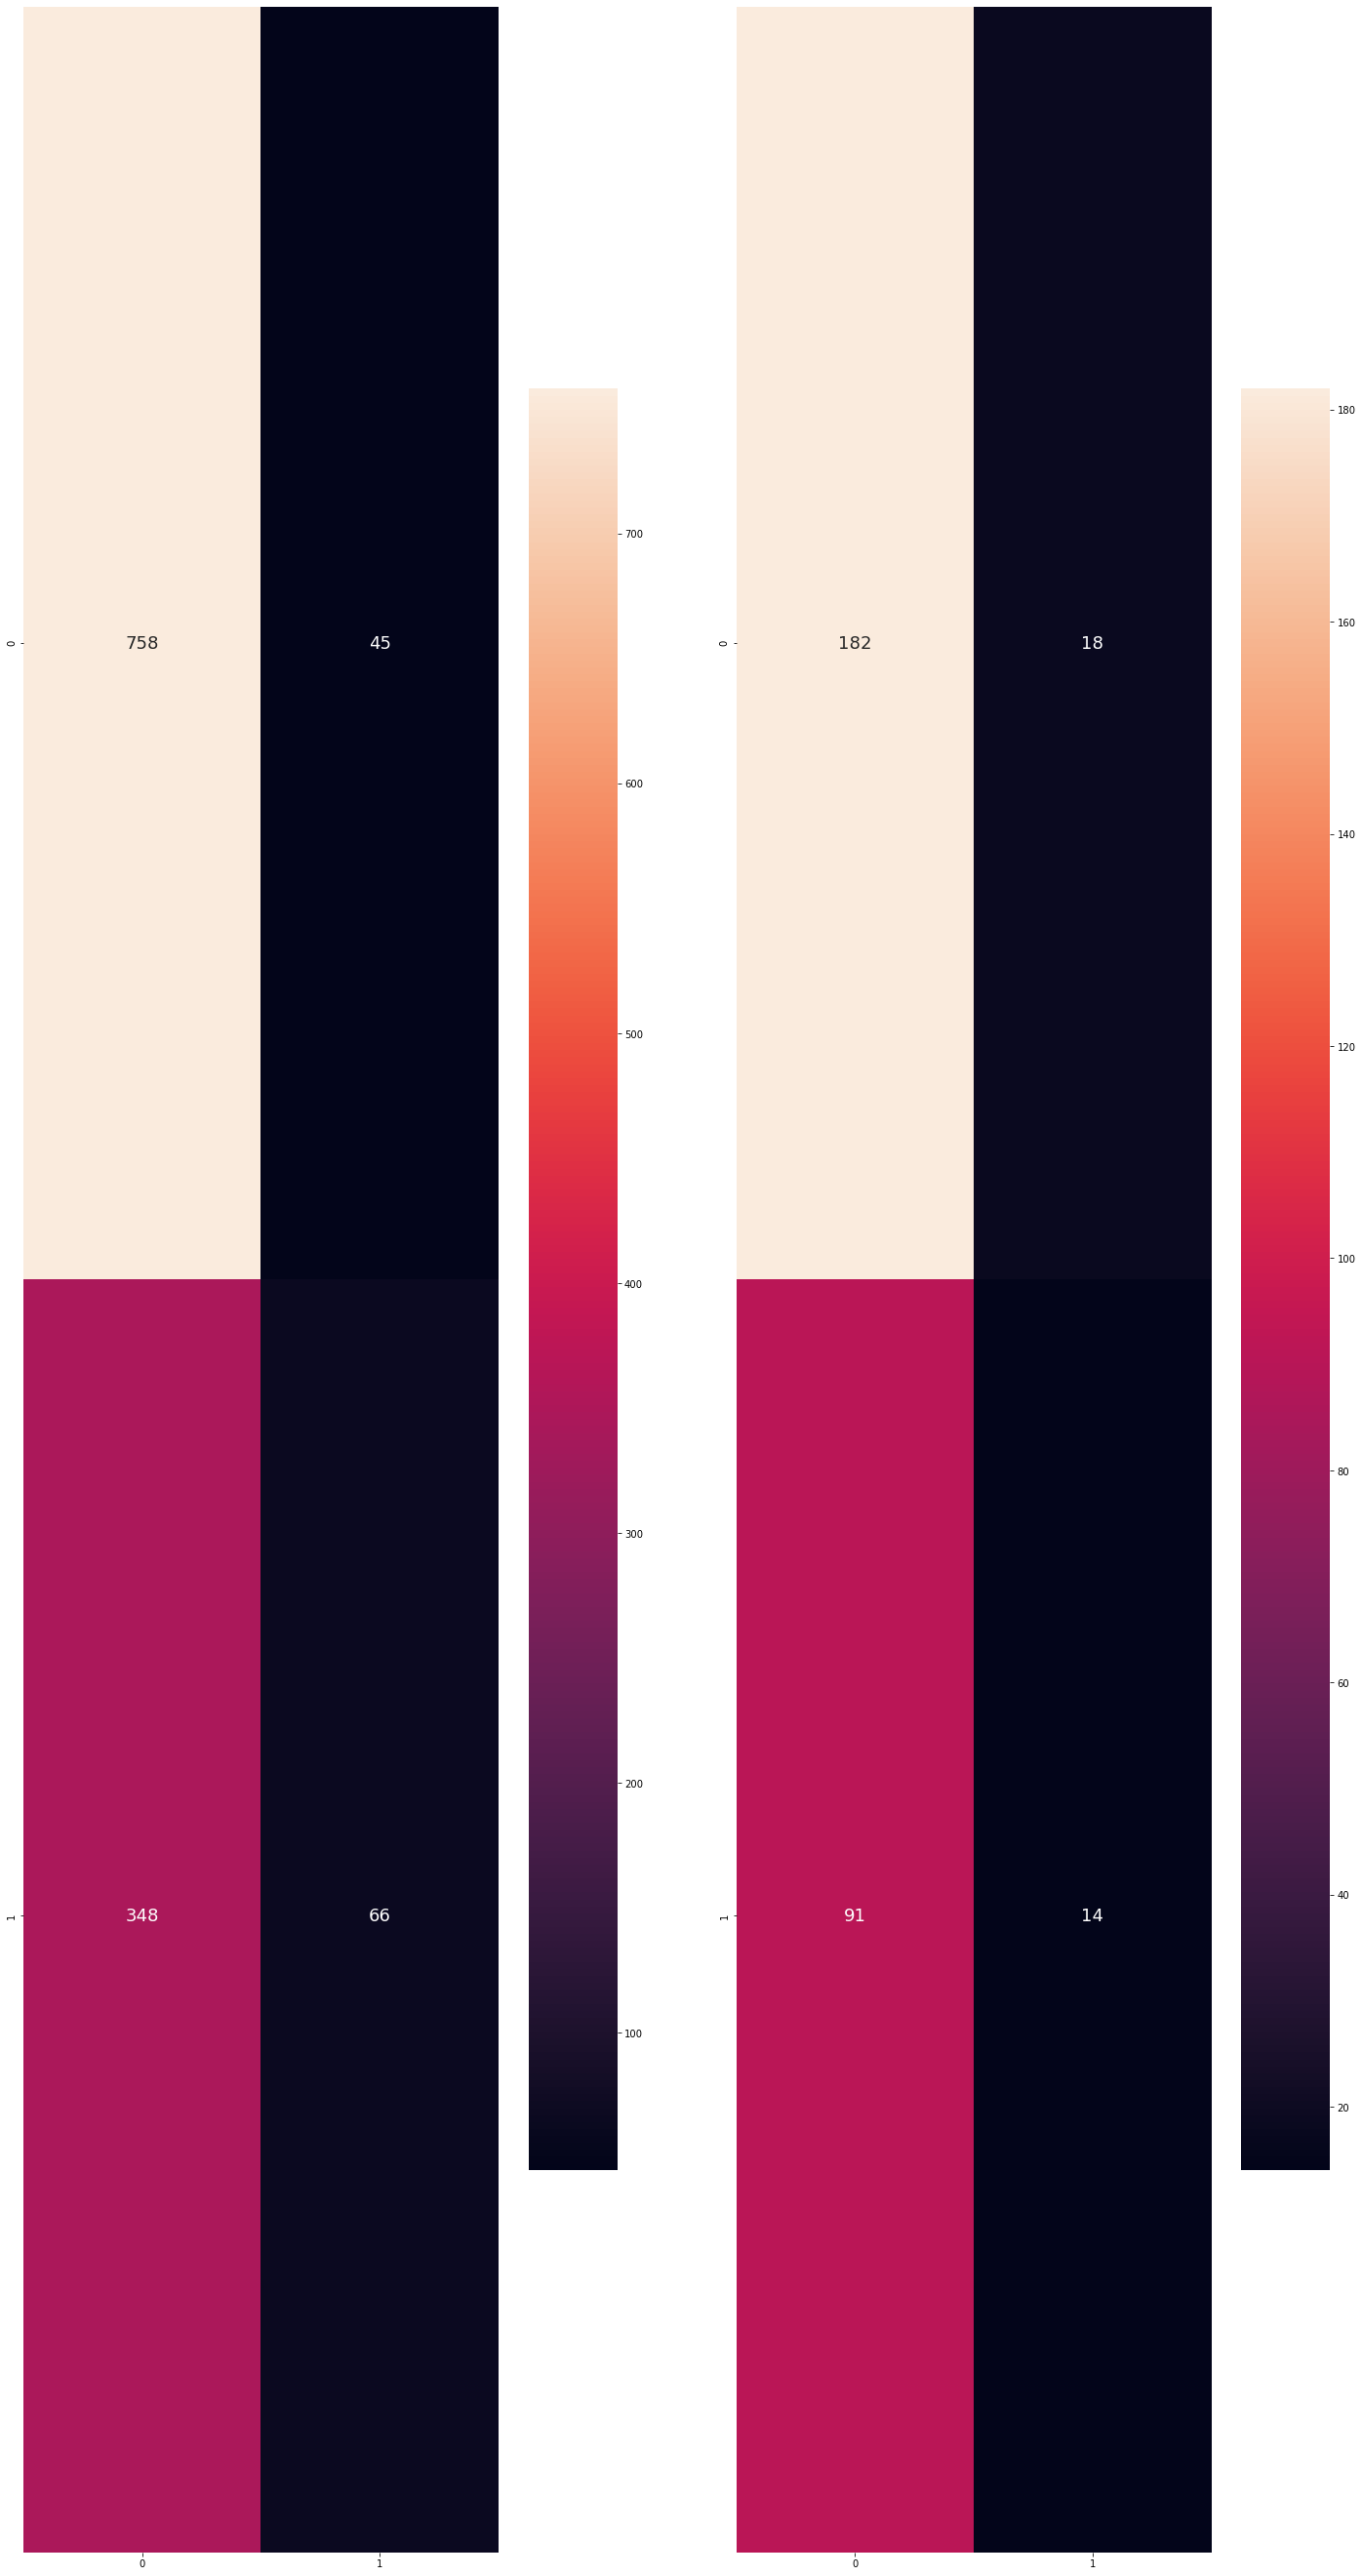

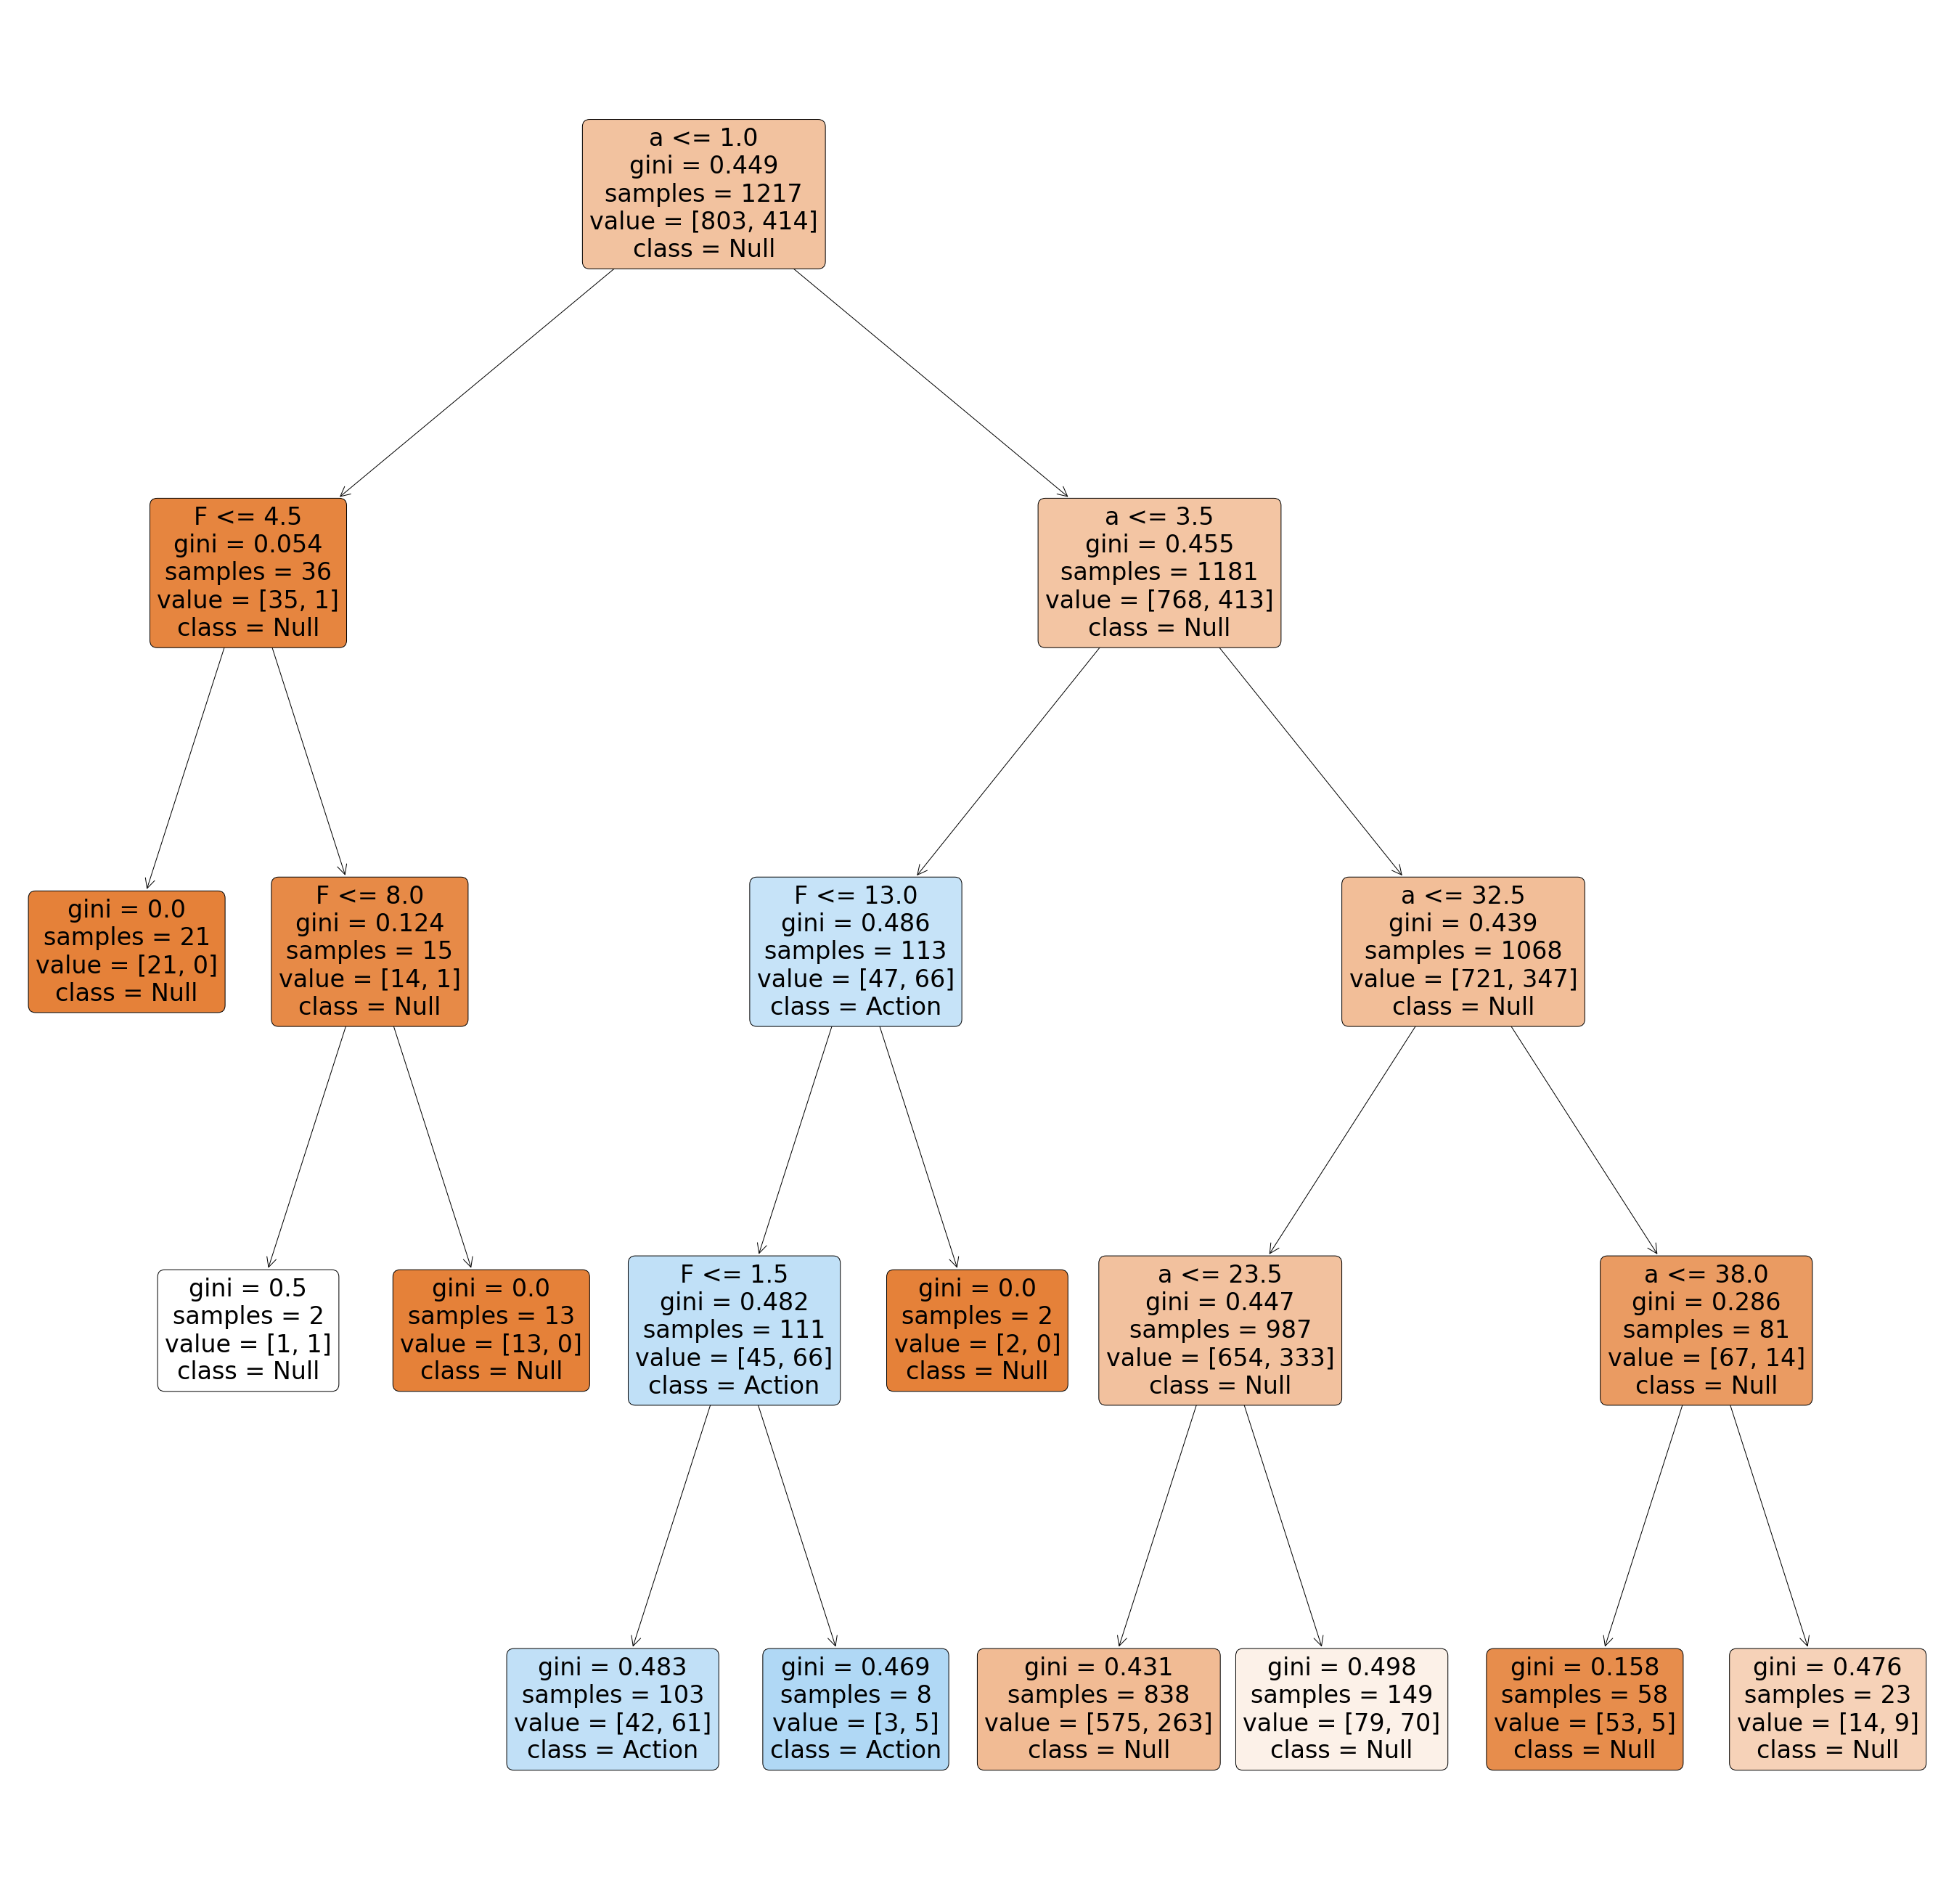

In [23]:
decTree2(TV_data_manga["Score_reference2"].to_numpy().reshape(-1,1),TV_data_manga["genre_reference_1"],
        TV_data_manga["genre_reference_2"],4)